# Melbourne, Australia

[![melbourne](img/melbourne.jpg)](img/melbourne.jpg)

**Overview:**<br/>
Using this [kaggle data](img/melbourne.jpg), we will create multiple models to predict a house's value and determine which is best. Let's explore and understand what creates value in a house, as though we were a real estate developer.<br/><br/>

**Import libraries:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Let's see what we have:**

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


Not good...as the show above we have alot of missing data, it's possible that missing data are missing in different location. Let's remove all missing data and see what we're left with...

In [3]:
df2 = df[df.Price.notnull()]
df2 = df2[df2.BuildingArea.notnull()]
df2 = df2[df2.Car.notnull()]
df2 = df2[df2.Landsize.notnull()]
df2 = df2[df2.Lattitude.notnull()]
df2 = df2[df2.Longtitude.notnull()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 2 to 29212
Data columns (total 21 columns):
Suburb           7996 non-null object
Address          7996 non-null object
Rooms            7996 non-null int64
Type             7996 non-null object
Price            7996 non-null float64
Method           7996 non-null object
SellerG          7996 non-null object
Date             7996 non-null object
Distance         7996 non-null float64
Postcode         7996 non-null int64
Bedroom2         7996 non-null float64
Bathroom         7996 non-null float64
Car              7996 non-null float64
Landsize         7996 non-null float64
BuildingArea     7996 non-null float64
YearBuilt        7696 non-null float64
CouncilArea      7996 non-null object
Lattitude        7996 non-null float64
Longtitude       7996 non-null float64
Regionname       7996 non-null object
Propertycount    7996 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 1.3+ MB


As we predicted it appears that the missing data are in different part of the dataframe. The above shows that the complete information is only 27% of it's original size. Let's work with what we have and see we can still gain insights. First let's see if number of bedrooms has a relationship to price. In real estate this would be one of the factors in price valuation.

In [4]:
print(pd.crosstab(df['Price'].mean(), df['Bedroom2']))
print('\n')

Bedroom2      0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
row_0                                                                      
1.056543e+06    17   955  5394  9916  5054  1149   131    23    13     5   

Bedroom2      10.0  12.0  16.0  20.0  30.0  
row_0                                       
1.056543e+06     4     1     1     1     1  




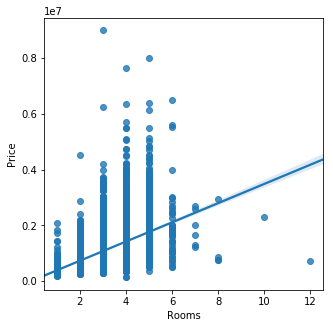

In [5]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(data=df2, x='Rooms', y='Price')
plt.show()

Although weak, it appears that there seems to be a positive relationship. Let's see what is the actual correlation between price and the other data points. We will look at this in 2 ways heatman for visualization and the correlation coefficient score.

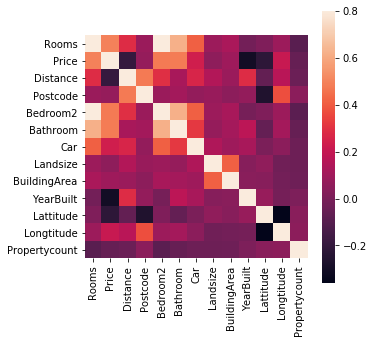

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.494581,0.288453,0.085099,0.960232,0.619406,0.411333,0.093070,0.127358,-0.018328,0.013074,0.090622,-0.087621
Price,0.494581,1.000000,-0.194238,0.072856,0.478581,0.479076,0.237390,0.056620,0.095754,-0.299988,-0.219599,0.211731,-0.052139
Distance,0.288453,-0.194238,1.000000,0.475217,0.295818,0.124530,0.264228,0.152701,0.089283,0.285264,-0.062924,0.169945,-0.038861
Postcode,0.085099,0.072856,0.475217,1.000000,0.088933,0.110196,0.067094,0.080635,0.050089,0.067449,-0.262150,0.373241,0.045263
Bedroom2,0.960232,0.478581,0.295818,0.088933,1.000000,0.622459,0.415130,0.093062,0.125662,-0.008104,0.017075,0.090758,-0.085141
Bathroom,0.619406,0.479076,0.124530,0.110196,0.622459,1.000000,0.316841,0.074827,0.116535,0.179076,-0.057417,0.114715,-0.053075
Car,0.411333,0.237390,0.264228,0.067094,0.415130,0.316841,1.000000,0.139481,0.095531,0.123389,0.007890,0.046212,-0.034775
Landsize,0.093070,0.056620,0.152701,0.080635,0.093062,0.074827,0.139481,1.000000,0.412730,0.035215,0.060388,-0.027811,-0.035849
BuildingArea,0.127358,0.095754,0.089283,0.050089,0.125662,0.116535,0.095531,0.412730,1.000000,0.042460,0.036123,-0.017954,-0.028323
YearBuilt,-0.018328,-0.299988,0.285264,0.067449,-0.008104,0.179076,0.123389,0.035215,0.042460,1.000000,0.078563,-0.010447,0.011755


In [6]:
f, ax = plt.subplots(figsize=(5, 5))
corrmat = df2.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

### Distribution of the data:

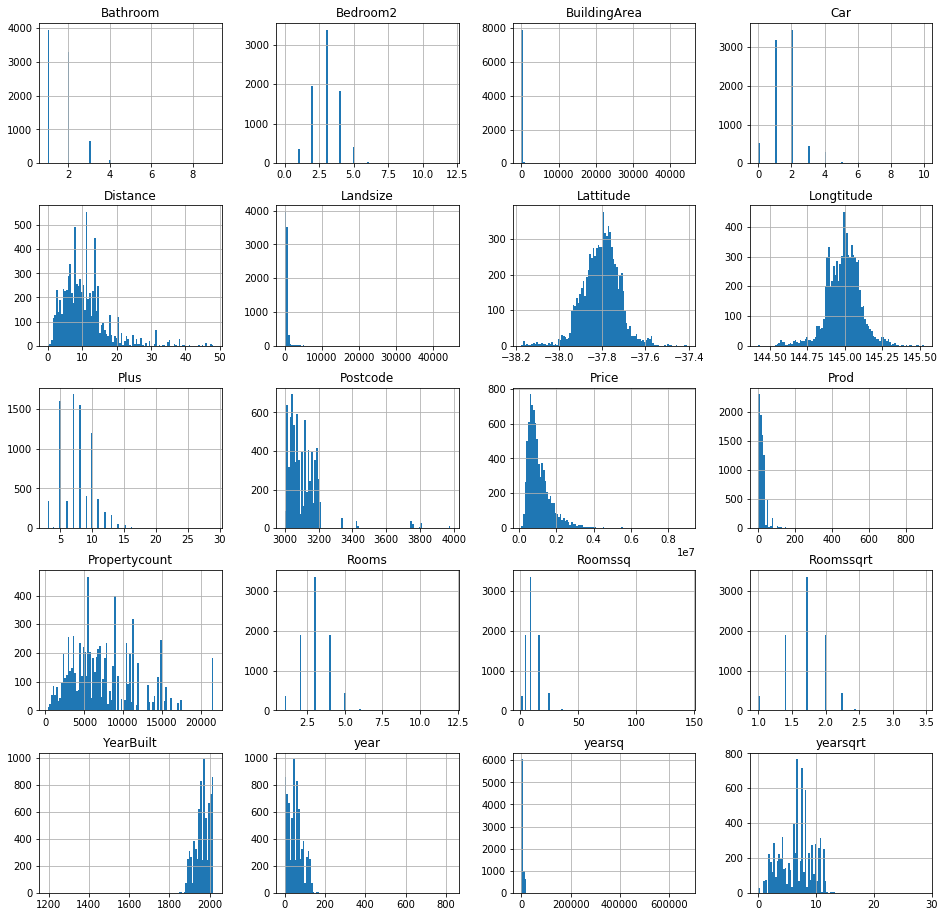

In [89]:
plt.rcParams['figure.figsize'] = 16, 16
df2.loc[:,:].hist(bins=100)
plt.show()

**Create new features:**
Let's create new features to see if these new features will have a stronger correlation coefficient score than the original. We will do so by mixing the data and altering the data.

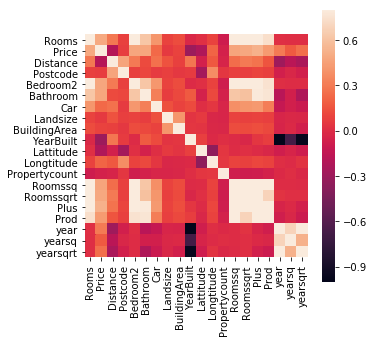

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Roomssq,Roomssqrt,Plus,Prod,year,yearsq,yearsqrt
Rooms,1.000000,0.494581,0.288453,0.085099,0.960232,0.619406,0.411333,0.093070,0.127358,-0.018328,0.013074,0.090622,-0.087621,0.964214,0.991368,0.962809,0.740456,0.018328,0.010691,0.010900
Price,0.494581,1.000000,-0.194238,0.072856,0.478581,0.479076,0.237390,0.056620,0.095754,-0.299988,-0.219599,0.211731,-0.052139,0.470862,0.489783,0.528837,0.431717,0.299988,0.181159,0.255147
Distance,0.288453,-0.194238,1.000000,0.475217,0.295818,0.124530,0.264228,0.152701,0.089283,0.285264,-0.062924,0.169945,-0.038861,0.248196,0.300460,0.269175,0.155061,-0.285264,-0.176333,-0.233983
Postcode,0.085099,0.072856,0.475217,1.000000,0.088933,0.110196,0.067094,0.080635,0.050089,0.067449,-0.262150,0.373241,0.045263,0.084566,0.081468,0.101842,0.088252,-0.067449,-0.029573,-0.065693
Bedroom2,0.960232,0.478581,0.295818,0.088933,1.000000,0.622459,0.415130,0.093062,0.125662,-0.008104,0.017075,0.090758,-0.085141,0.924333,0.953034,0.963738,0.751540,0.008104,0.005242,0.002099
Bathroom,0.619406,0.479076,0.124530,0.110196,0.622459,1.000000,0.316841,0.074827,0.116535,0.179076,-0.057417,0.114715,-0.053075,0.622569,0.598116,0.790041,0.766004,-0.179076,-0.067353,-0.225668
Car,0.411333,0.237390,0.264228,0.067094,0.415130,0.316841,1.000000,0.139481,0.095531,0.123389,0.007890,0.046212,-0.034775,0.382184,0.412547,0.422445,0.312516,-0.123389,-0.064863,-0.100020
Landsize,0.093070,0.056620,0.152701,0.080635,0.093062,0.074827,0.139481,1.000000,0.412730,0.035215,0.060388,-0.027811,-0.035849,0.094025,0.089436,0.096169,0.079377,-0.035215,-0.022486,-0.025896
BuildingArea,0.127358,0.095754,0.089283,0.050089,0.125662,0.116535,0.095531,0.412730,1.000000,0.042460,0.036123,-0.017954,-0.028323,0.126656,0.123221,0.135119,0.115857,-0.042460,-0.008875,-0.069302
YearBuilt,-0.018328,-0.299988,0.285264,0.067449,-0.008104,0.179076,0.123389,0.035215,0.042460,1.000000,0.078563,-0.010447,0.011755,-0.003152,-0.026926,0.042212,0.073345,-1.000000,-0.682966,-0.965115


In [8]:
df2['Roomssq'] = df2.Rooms ** 2
df2['Roomssqrt'] = df2.Rooms ** (1/2)
df2['Plus'] = df2.Rooms + df2.Bedroom2 + df2.Bathroom
df2['Prod'] = df2.Rooms * df2.Bedroom2 * df2.Bathroom
df2['year'] = (2017 - df2.YearBuilt)
df2['yearsq'] = (2017 - df2.YearBuilt) ** 2
df2['yearsqrt'] = (2017 - df2.YearBuilt) ** (1/2)

f, ax = plt.subplots(figsize=(5, 5))
corrmat = df2.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

It appears that the column **"Plus"** has a correlation score of .529 which is the highest correlation score out of all the features new and old. This new feature was created by rooms, bedrooms and bathrooms.<br/>

Let's drop the weakest scores and run our first model **"Decision Tree Regressor"**

In [9]:
X = df2.drop(['YearBuilt', 'year', 'yearsq', 'yearsqrt', 'Price',], axis=1)
Y = df2.Price
X = pd.get_dummies(data=X)

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtr = DecisionTreeRegressor(max_features=10, max_depth=10)
dtr.fit(X, Y)
print(cross_val_score(dtr, X, Y, cv=5))

[-0.04384913  0.00482545  0.00621629 -0.04248696 -0.00801812]


The scores above is bad...Let's take a look at why it's bad

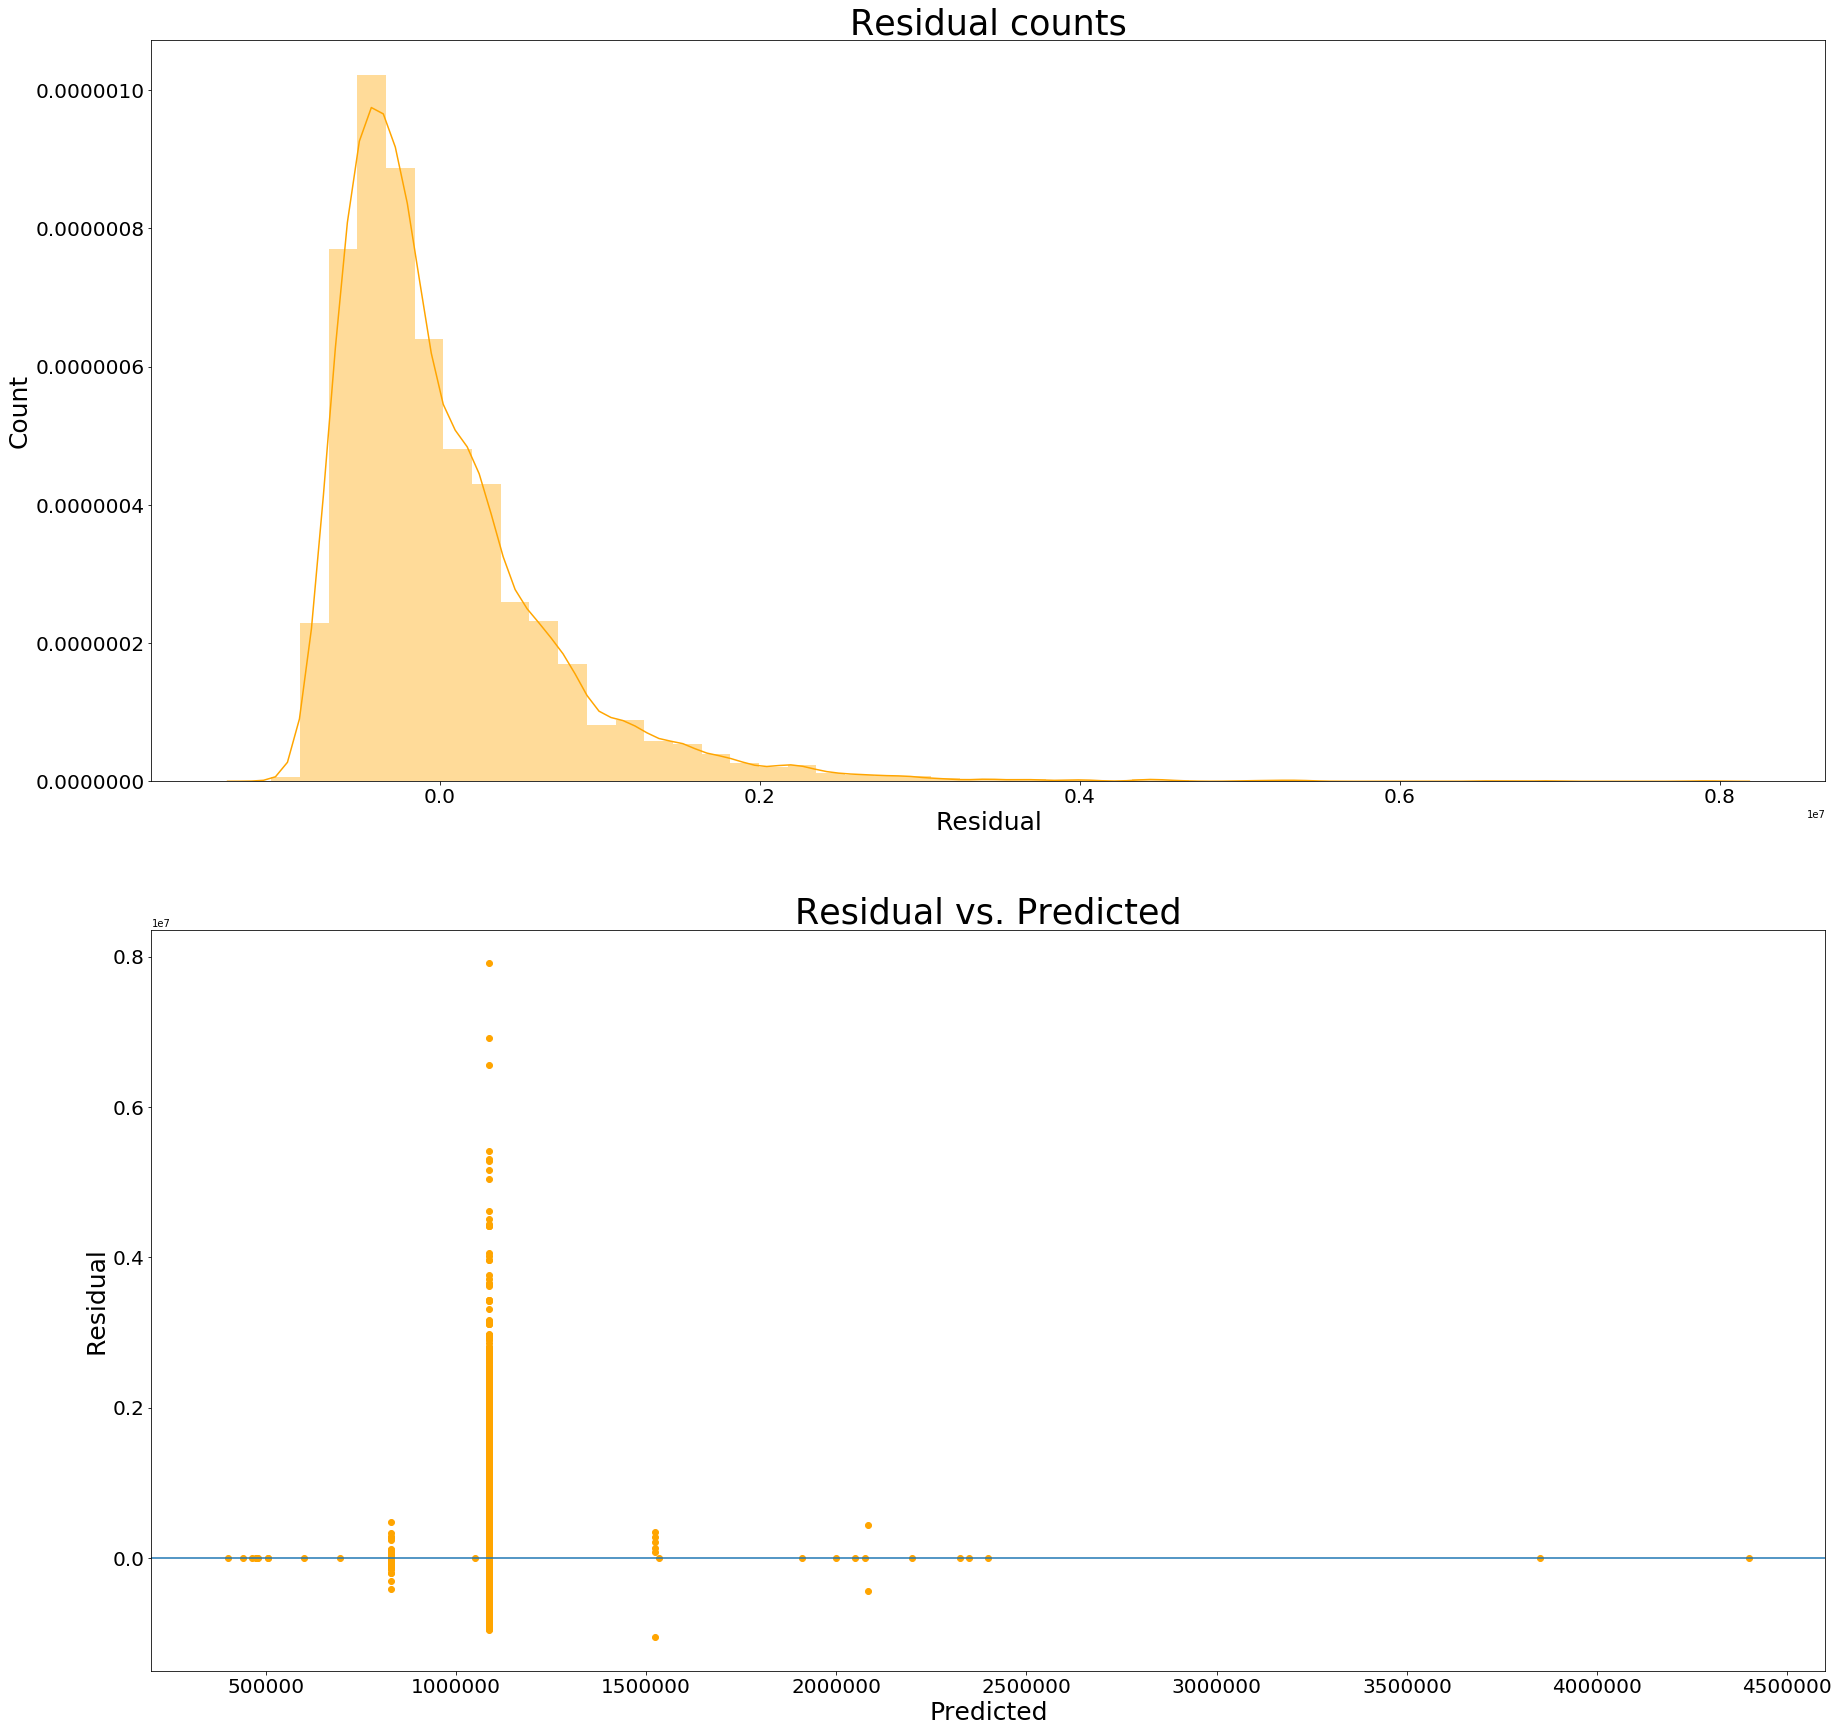

RMSE:
677273.379164


In [11]:
predicted = dtr.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

**The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error)** is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular data and not between datasets, as it is scale-dependent. ~ [WikiPedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

The higher the RMSE the worst our predicting model is and the reason why the RMSE score is high and bad is because it appears this model picked a single price point for the categories that the model selected this is shown in the graphs above. 


### Let's take a different approach... 
and think like a real estate agents. As real estate agents we should look the **comparables** see what a house like what we're trying to predict is priced based on sales of similar homes. Let's use the next model **"Nearest Neighbors"** and use the 2 nearnest neighbors.

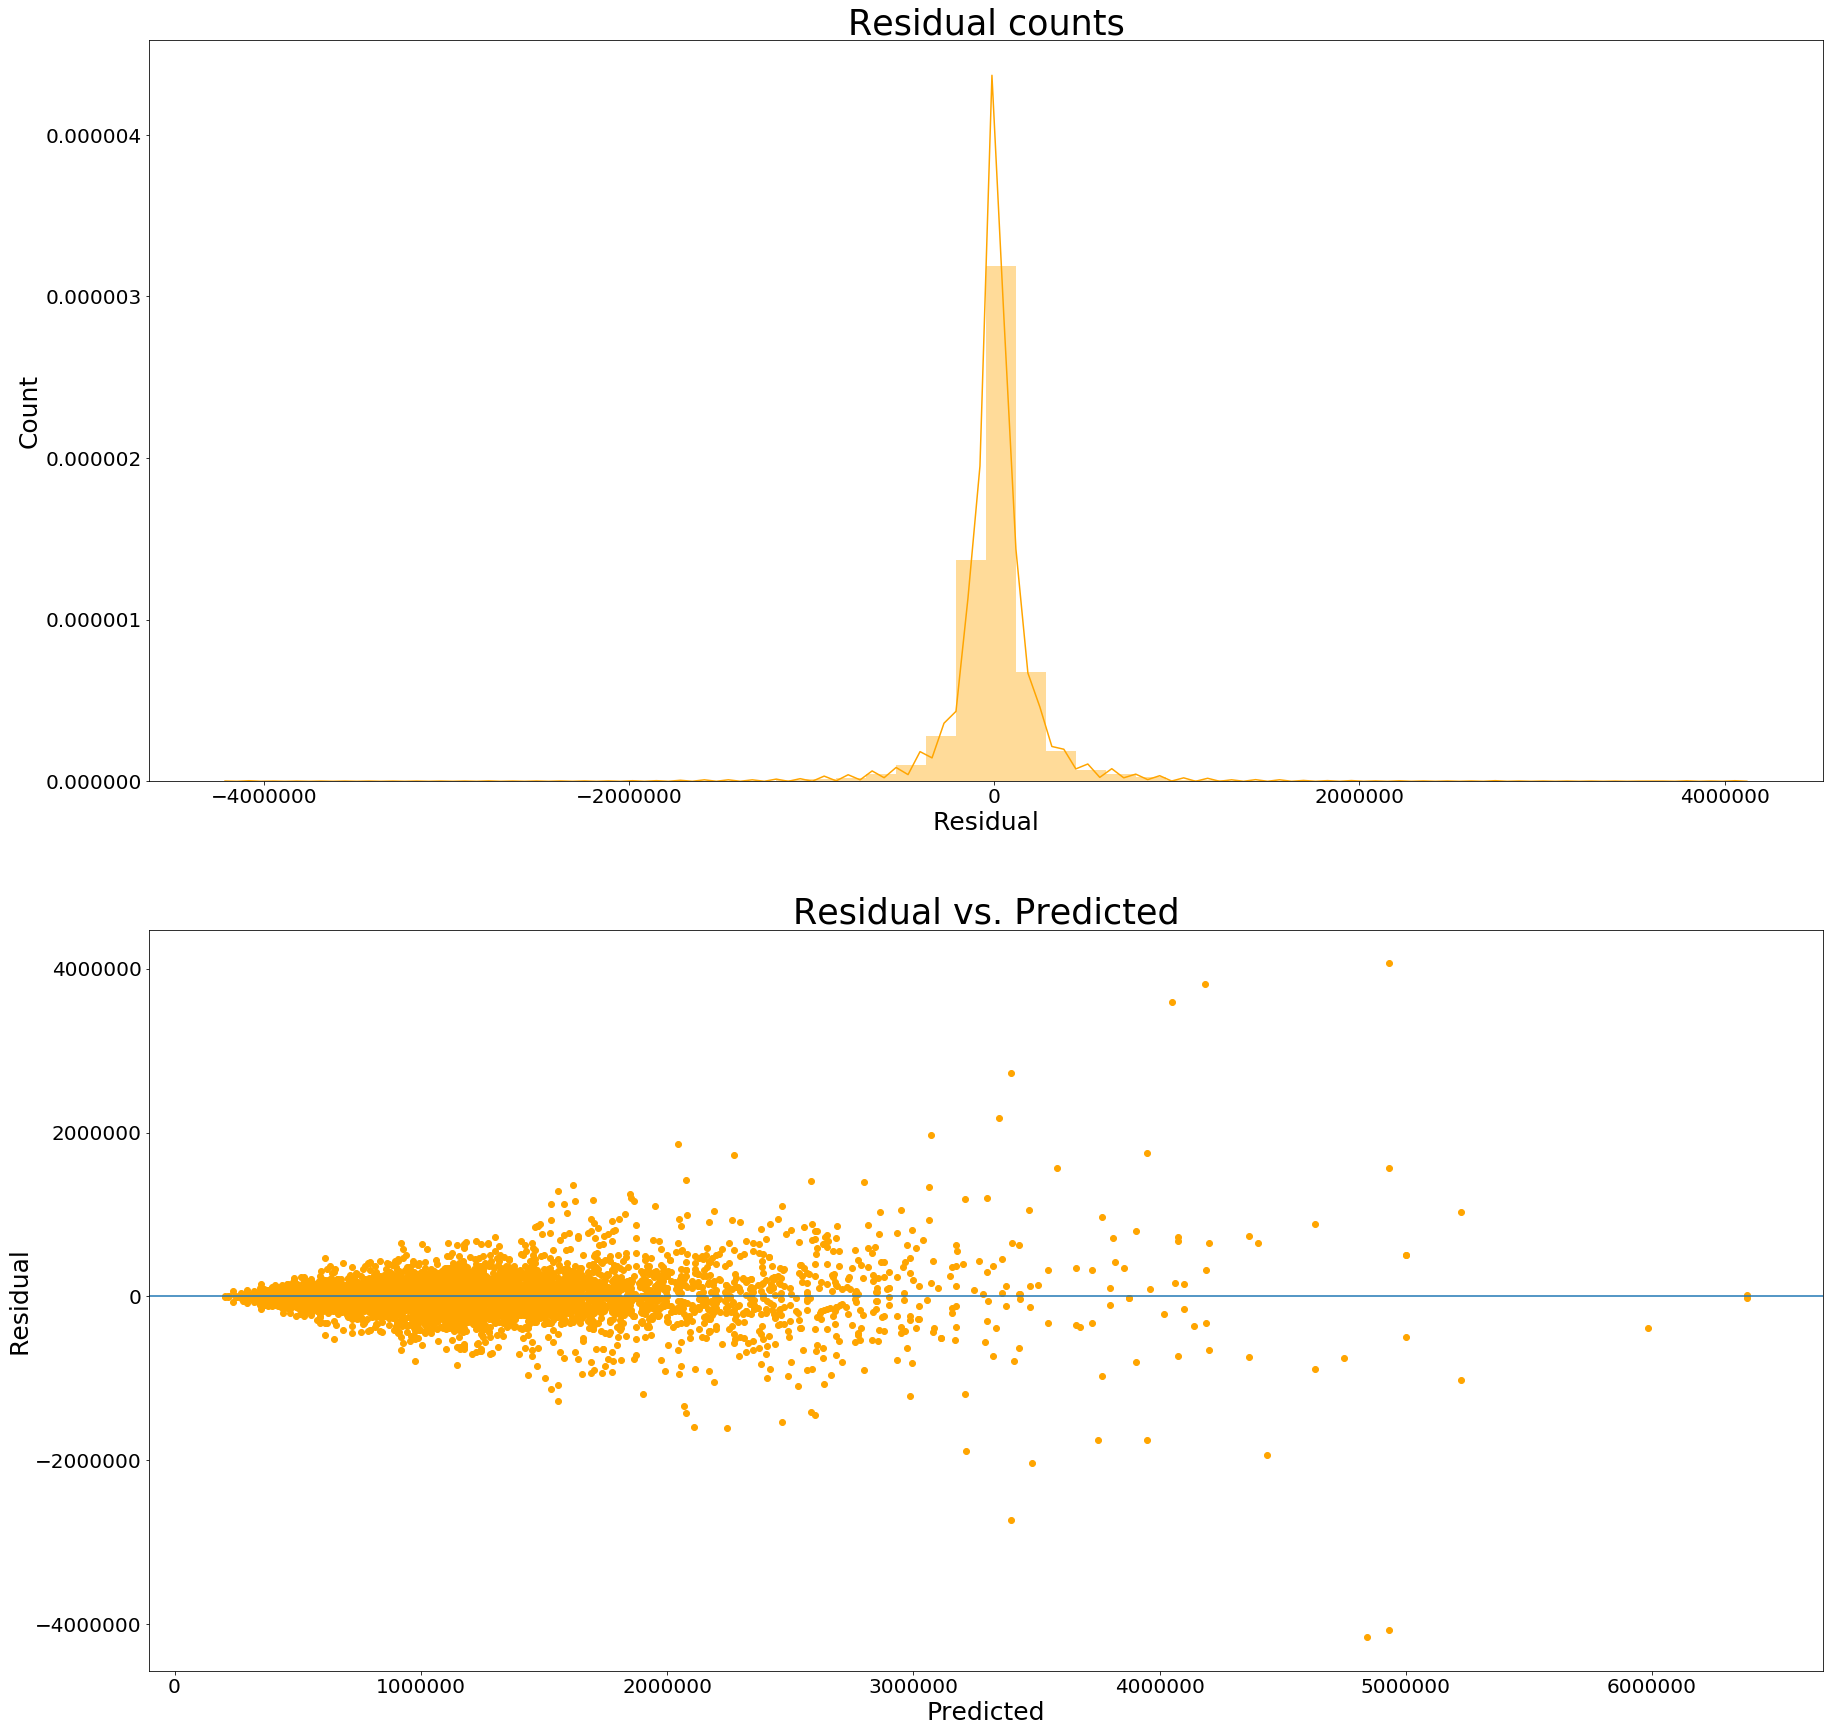

RMSE:
246010.726124


In [12]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)

predicted = knn.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

By looking at the RMSE score this we've vast improvements, as you can see from the "Residual vs. Predicted" that the predicted score is closer to zero and is tighter around the lines which means that we are guessing alot closer to the price.

### What if...
the **2 nearest neighbors** is not the optimal number. Lets see if we can find the optimal number of neighbors.

In [13]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X, Y)
    predicted = knn.predict(X)
    rmse_l.append(np.sqrt(mean_squared_error(Y, predicted)))
    num.append(n)

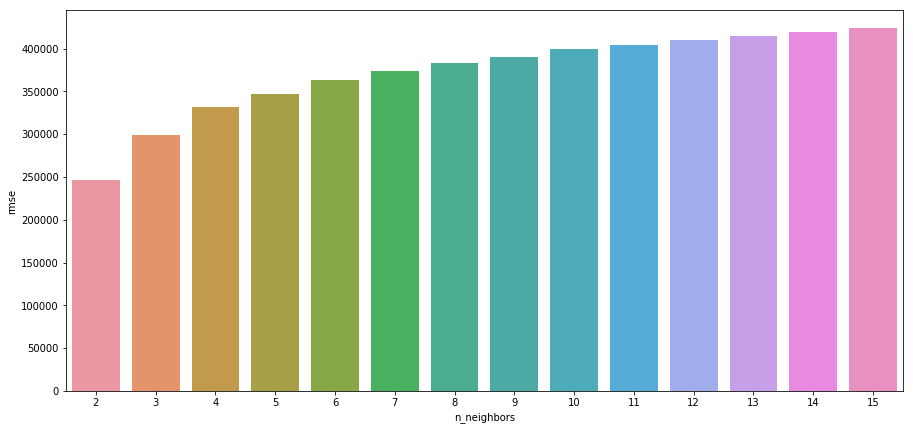

In [14]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

In [15]:
print(rmse_l)

[246010.72612387789, 299140.89928988385, 331499.77892903792, 347367.56599903584, 363610.28713245952, 373641.28252136859, 382776.00220798928, 390369.98595582315, 399132.94385391136, 404725.34418166213, 410064.63836764981, 414764.42545172054, 419022.88172154903, 423461.00056615419]


It appears that 2 nearest neighbors is the optimal number of neighbors. This is evidenced by the increasing RMSE as we increase the number of neighbors.

### Lasso & Ridge:

Let's look at a model **"Lasso" & "Ridge"**, these models will penalize the model for larger coefficients. So these models will regularizes the way it predicts the price. Lets try a low alpha first and see how it performs.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


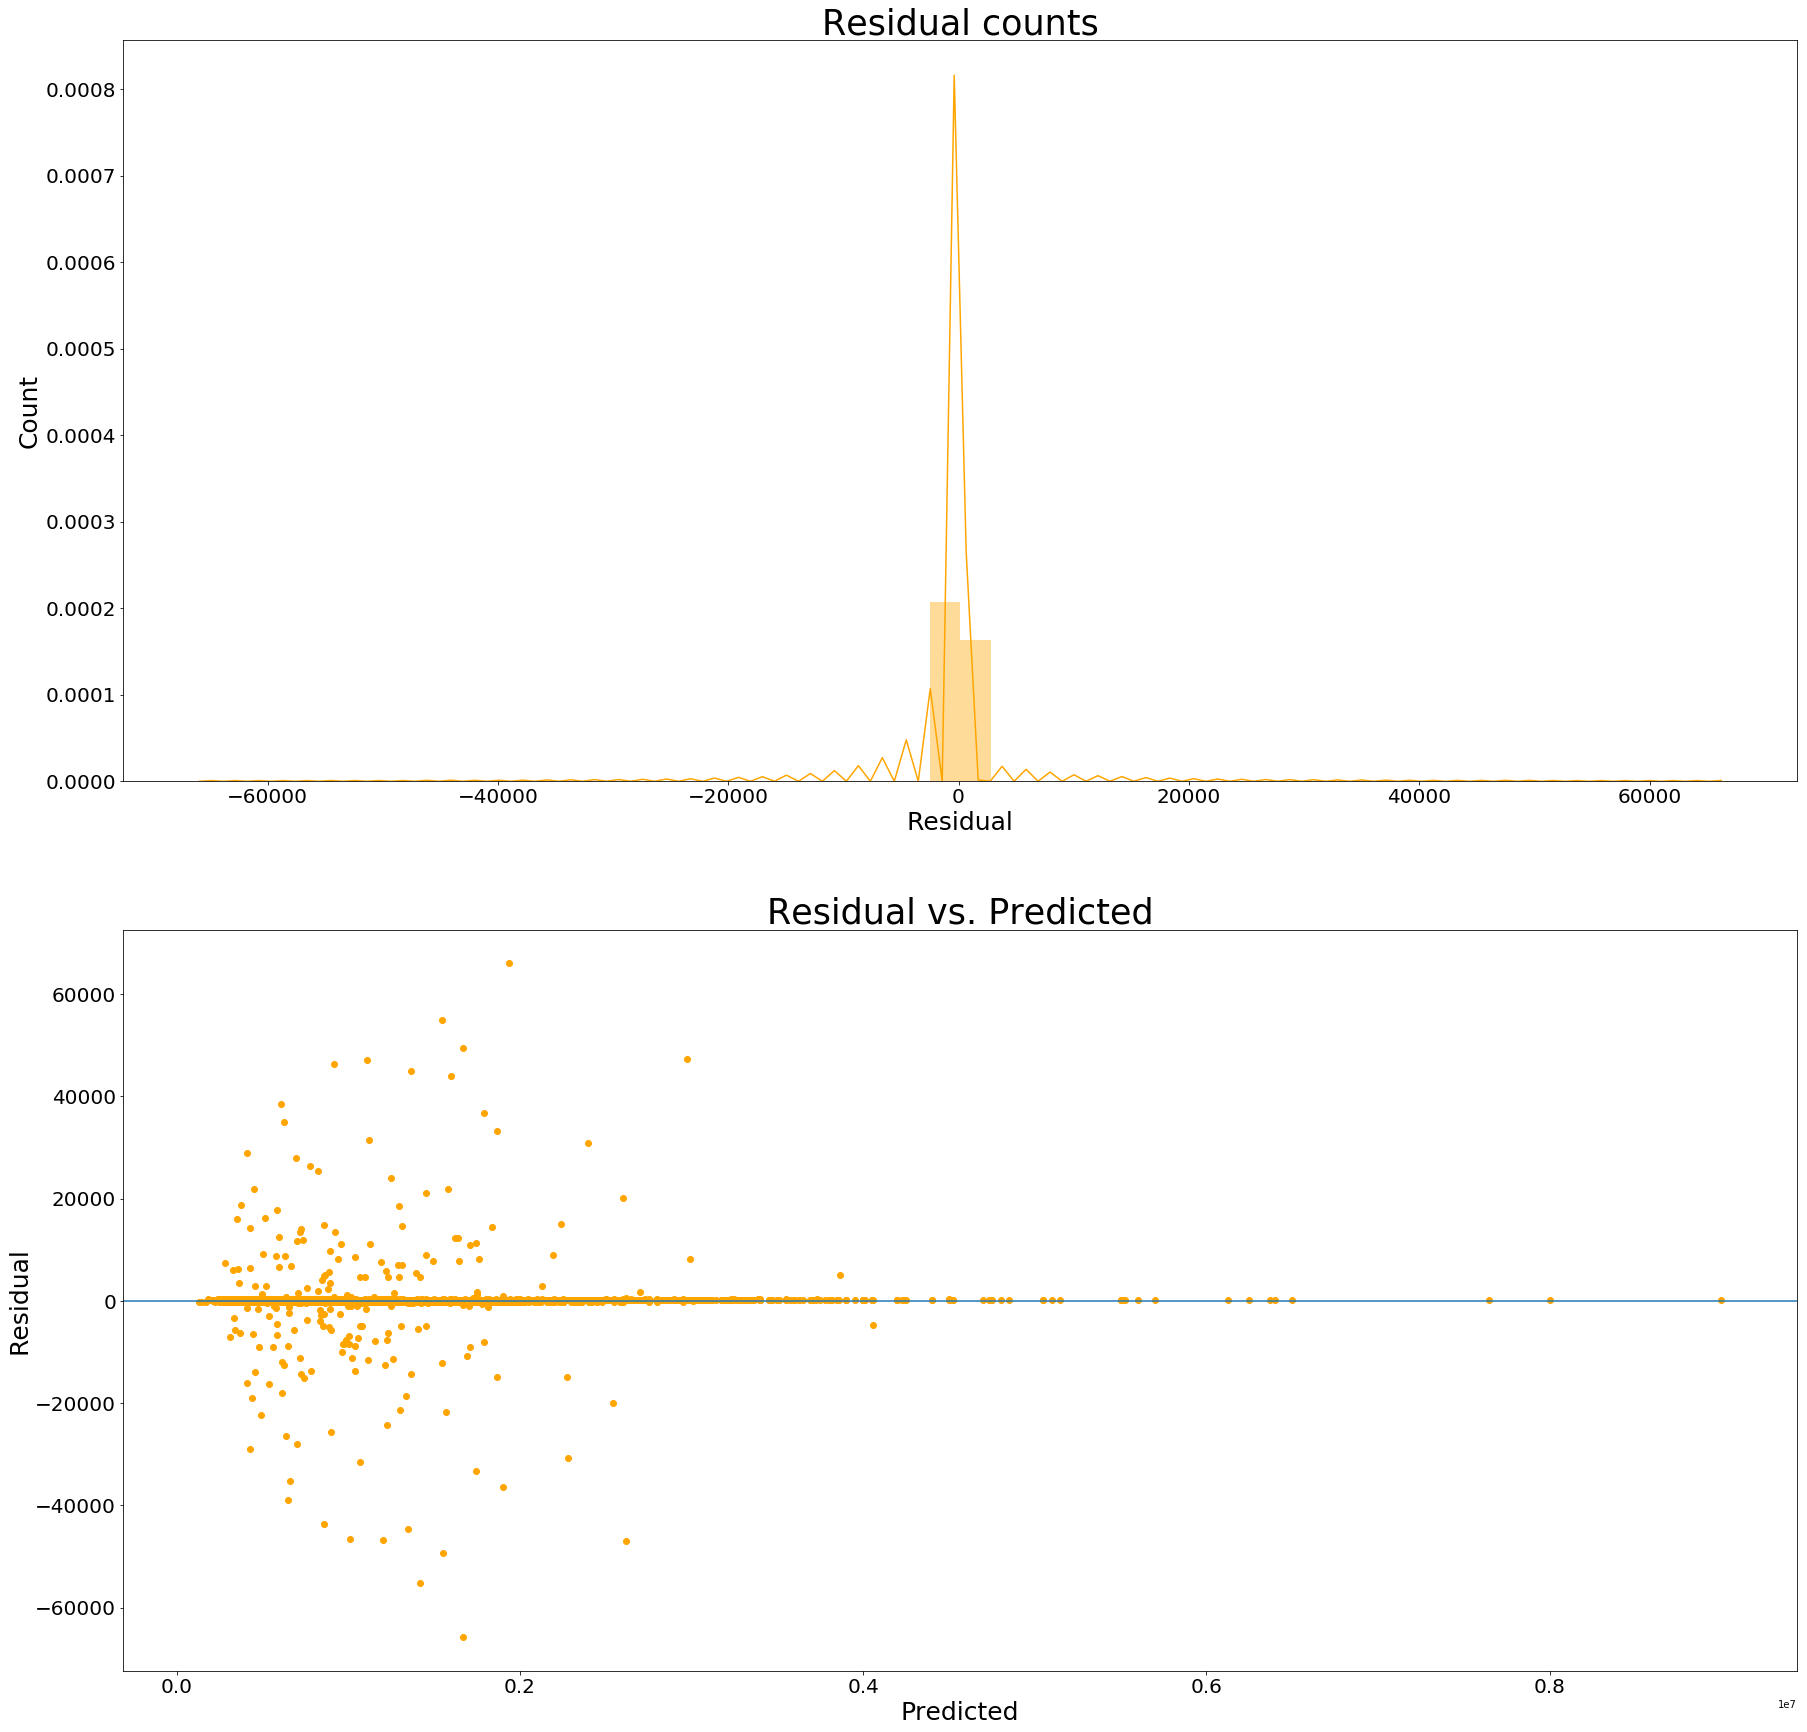

RMSE:
3127.28332239


In [16]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha = .025)
lass.fit (X, Y)

predicted = lass.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [17]:
alp = .1
for n in range (0,3):
    lass = linear_model.Lasso(alpha = alp)
    lass.fit (X, Y)
    predicted = lass.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, predicted))
    alp = alp + .1
    print('RMSE:')
    print(rmse)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


RMSE:
5051.22727146
RMSE:
6992.45802529
RMSE:
8405.56195252


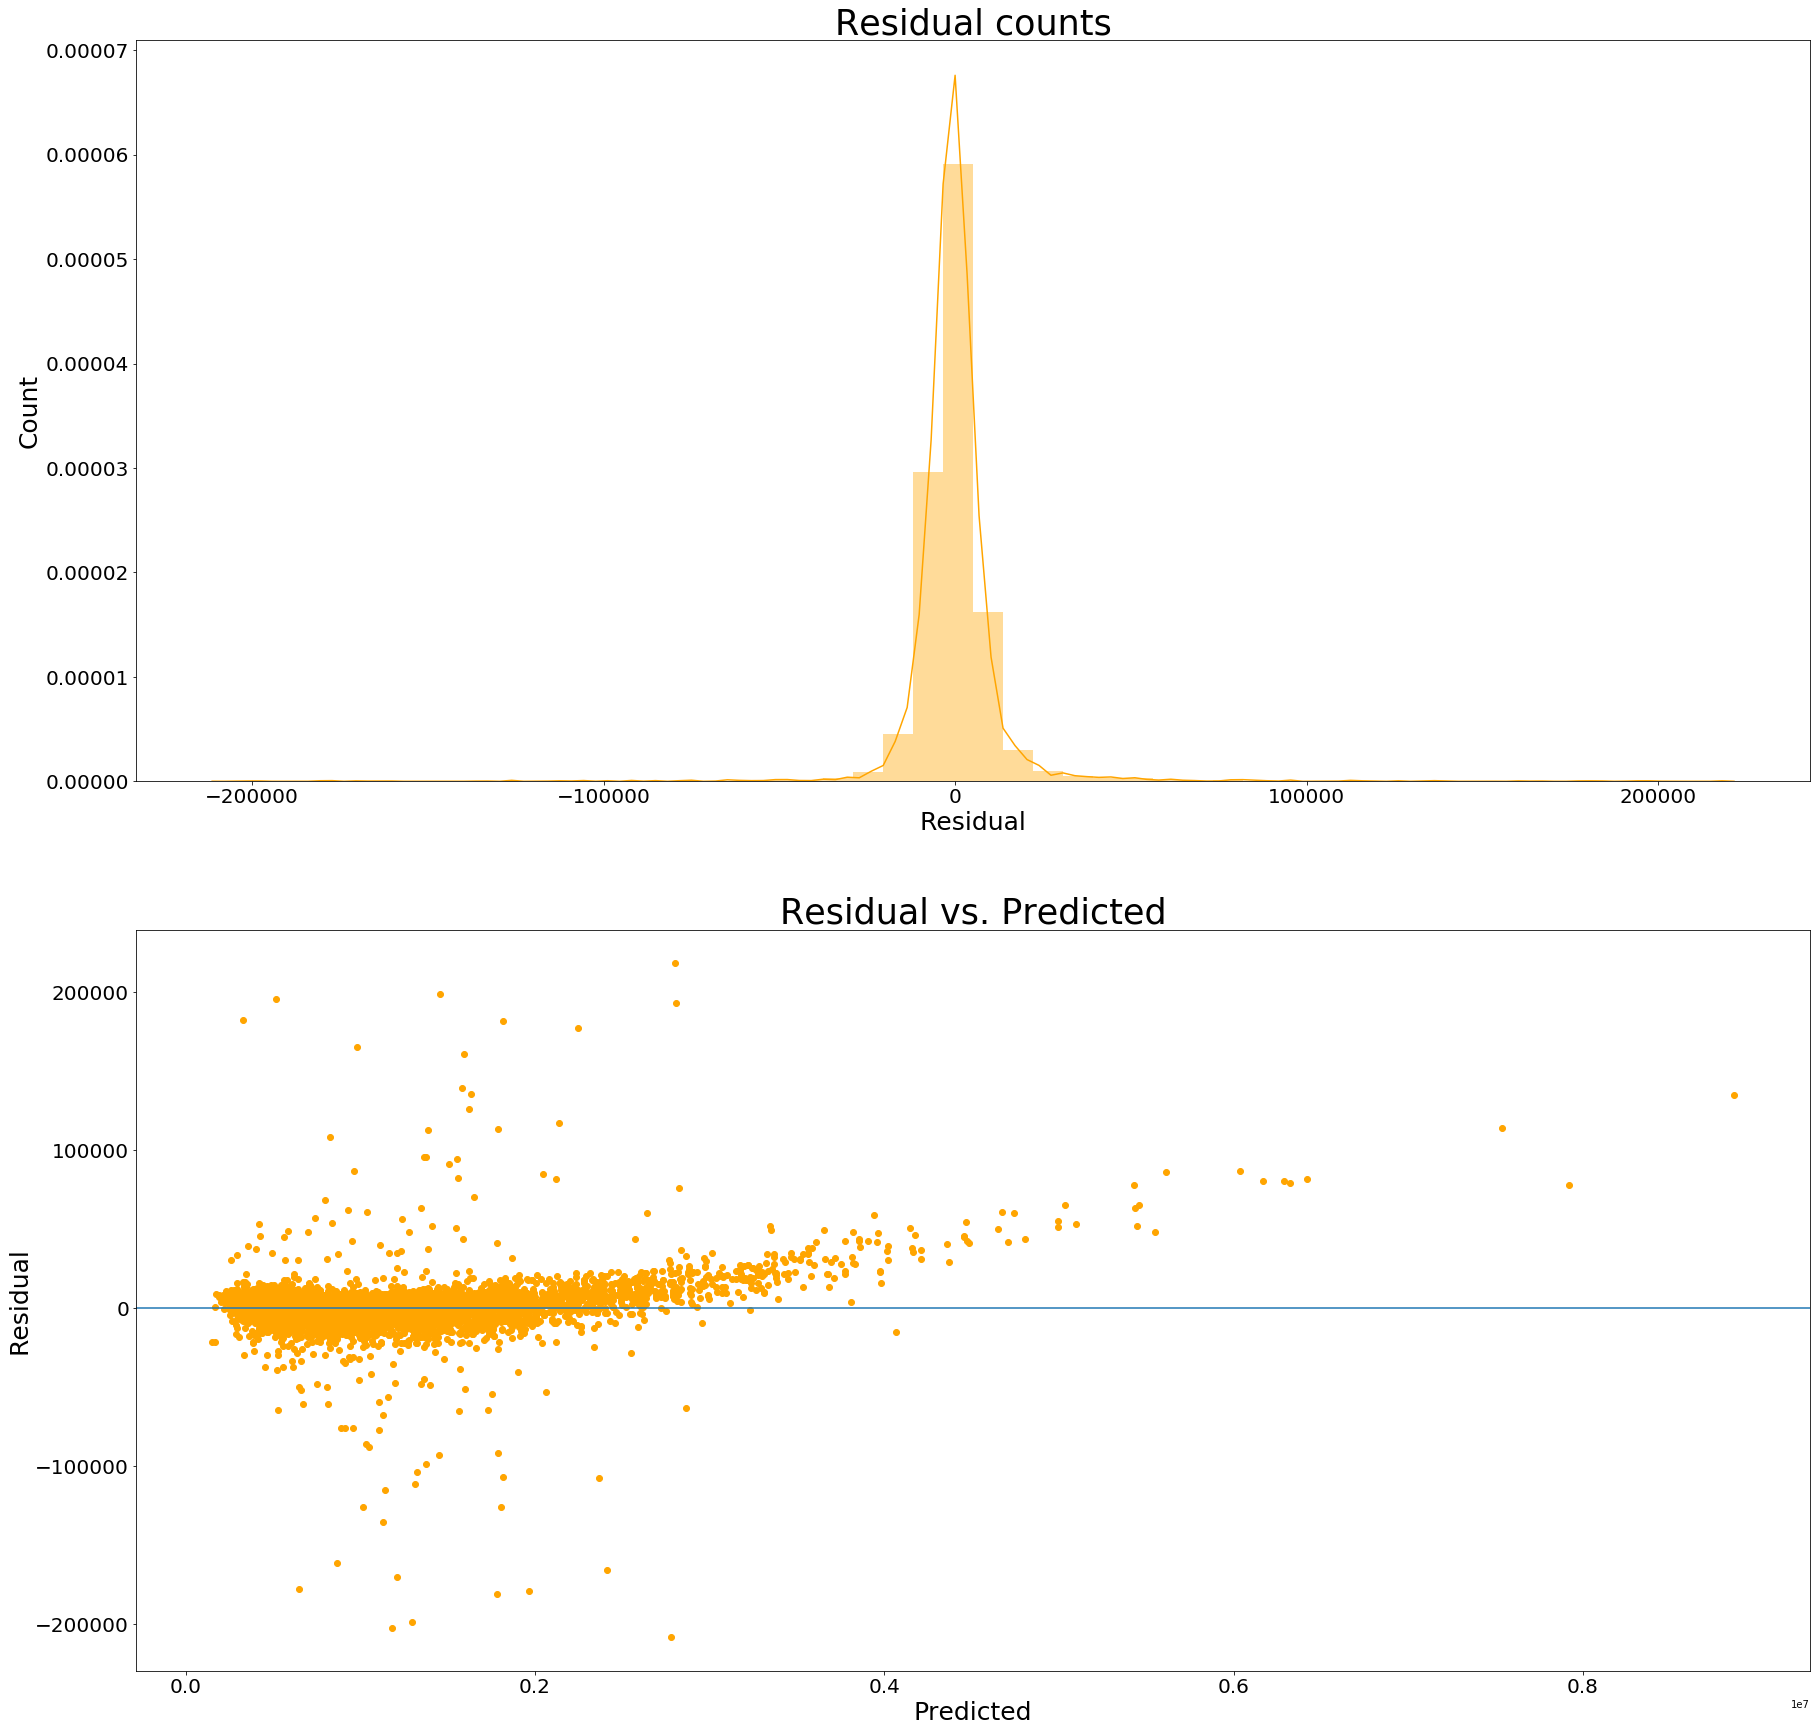

RMSE:
14735.7430427


In [18]:
rid = linear_model.Ridge(alpha = .025)
rid.fit (X, Y)

predicted = rid.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [19]:
lass = linear_model.Lasso(alpha = .025)
lass.fit (X, Y)

print('\nR² for the model with many features:')
print(lass.score(X, Y))
origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter features:')
print(origparams)

print('\nCross Validation Score:')
print(cross_val_score(lass, X, Y, cv=3))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



R² for the model with many features:
0.999978896199

Parameter features:
[  2.78474750e+05  -3.18044880e+04   1.21400677e+03 ...,  -5.06936783e+03
   8.31002277e+03  -1.13875073e+08]

Cross Validation Score:
[ 0.55646913  0.50086776  0.316526  ]


In [20]:
print('\nR² for the model with many features:')
print(rid.score(X, Y))
origparams_rid = np.append(rid.coef_, rid.intercept_)
print('\nParameter features:')
print(origparams_rid)

print('\nCross Validation Score:')
print(cross_val_score(rid, X, Y, cv=3))


R² for the model with many features:
0.99953143451

Parameter features:
[  3.91214876e+05  -2.71636117e+04   5.52594516e+01 ...,  -2.26956578e+05
  -4.08276244e+04   2.48205246e+06]

Cross Validation Score:
[ 0.67358221  0.61304098  0.39449955]


In [21]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)

print(cross_val_score(knn, X, Y, cv=3))

[ 0.50671677  0.36062201  0.27205626]


### Lasso & Ridge Summary:
It appears that a low alpha created a low RMSE score however when we crossvalidated the scores it appears that the model is overfitting, and this is evidenced by the graph with alot of the prices really tight along the line of zero.

### Working with more data:
Since working with a reduced amount of data may skew our models predicting ability let's attempt to keep as much of the data as possible.

In [22]:
df3 = df[df.Price.notnull()]
#df3 = df3[df3.BuildingArea.notnull()]
df3 = df3[df3.Car.notnull()]
#df3 = df3[df3.Landsize.notnull()]
#df3 = df3[df3.Lattitude.notnull()]
#df3 = df3[df3.Longtitude.notnull()]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17503 entries, 1 to 29216
Data columns (total 21 columns):
Suburb           17503 non-null object
Address          17503 non-null object
Rooms            17503 non-null int64
Type             17503 non-null object
Price            17503 non-null float64
Method           17503 non-null object
SellerG          17503 non-null object
Date             17503 non-null object
Distance         17503 non-null float64
Postcode         17503 non-null int64
Bedroom2         17503 non-null float64
Bathroom         17503 non-null float64
Car              17503 non-null float64
Landsize         15201 non-null float64
BuildingArea     9064 non-null float64
YearBuilt        10359 non-null float64
CouncilArea      17503 non-null object
Lattitude        17481 non-null float64
Longtitude       17481 non-null float64
Regionname       17503 non-null object
Propertycount    17503 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 2.9+ MB


In [23]:
df3 = df3.drop(['BuildingArea', 'YearBuilt', 'Landsize', 'Lattitude', 'Longtitude'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17503 entries, 1 to 29216
Data columns (total 16 columns):
Suburb           17503 non-null object
Address          17503 non-null object
Rooms            17503 non-null int64
Type             17503 non-null object
Price            17503 non-null float64
Method           17503 non-null object
SellerG          17503 non-null object
Date             17503 non-null object
Distance         17503 non-null float64
Postcode         17503 non-null int64
Bedroom2         17503 non-null float64
Bathroom         17503 non-null float64
Car              17503 non-null float64
CouncilArea      17503 non-null object
Regionname       17503 non-null object
Propertycount    17503 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 2.3+ MB


Alright we kept about 60% of the original data. Please note that features above that were dropped were due to low correlation coefficient scores.

### Let's take feature engineering to a new level:
Lets create markers of min, mean and max price of:
- Suburb
- Type (of property)
- Method
- Seller (Sales Agent)
- Council Area
- Region Name

By creating these markers, we are hoping this will give the model a better idea that certain area, types, sales agent, etc.. will be a better indicator of price points.

In [24]:
temp = df3.groupby('Suburb').agg({'min', 'mean', 'max'})
temp2 = temp['Price']
temp2 = temp2.reset_index()
temp2.columns = ['Suburb', 'max_sub_id', 'min_sub_id', 'mean_sub_id']
print(temp2.info())
temp2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
Suburb         330 non-null object
max_sub_id     330 non-null float64
min_sub_id     330 non-null float64
mean_sub_id    330 non-null float64
dtypes: float64(3), object(1)
memory usage: 10.4+ KB
None


,Suburb,max_sub_id,min_sub_id,mean_sub_id
0,Abbotsford,1.067377e+06,1876000.0,300000.0
1,Aberfeldie,1.335151e+06,3900000.0,280000.0
2,Airport West,7.645517e+05,1250000.0,421000.0
3,Albanvale,5.360556e+05,655000.0,415000.0
4,Albert Park,2.002345e+06,4735000.0,442500.0


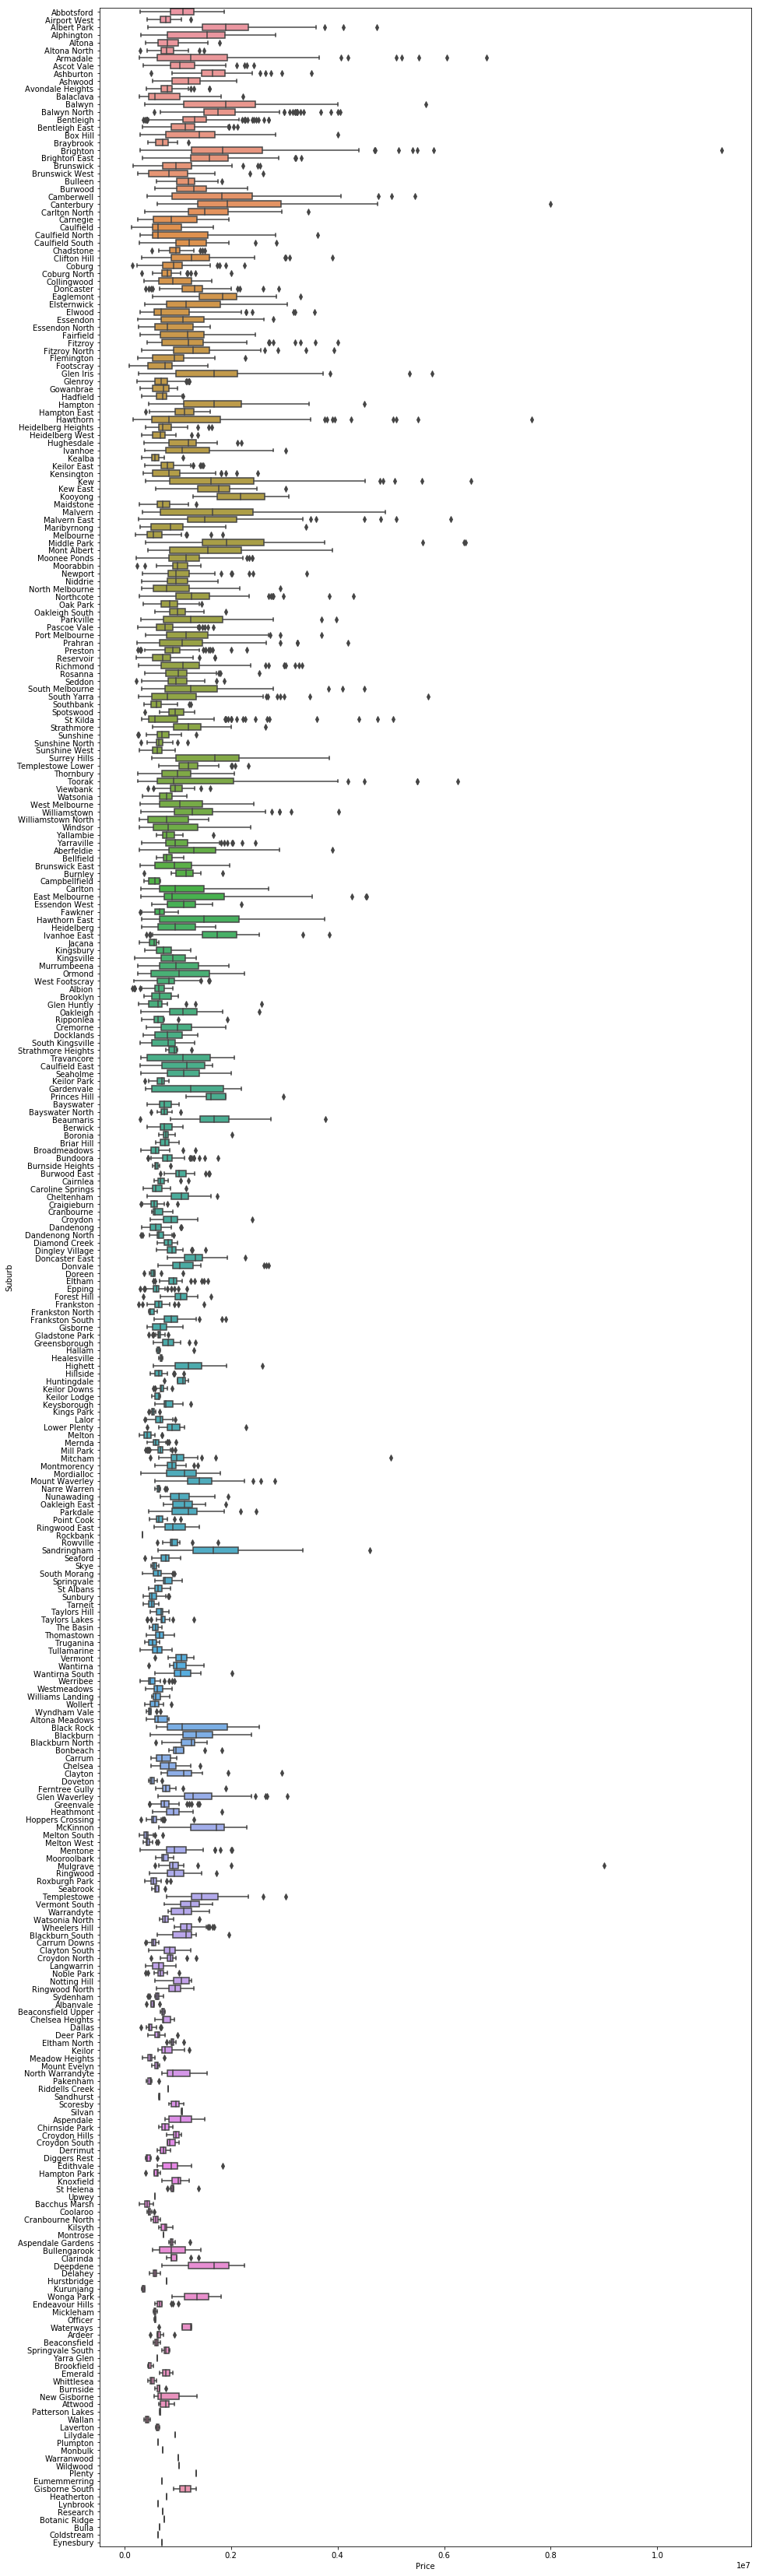

In [25]:
f, ax = plt.subplots(figsize=(15, 60))
sns.boxplot(data = df3, x='Price', y='Suburb')
plt.show()

In [26]:
df_copy = df3
df_copy = pd.merge(df_copy, temp2, on='Suburb', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Regionname,Propertycount,max_sub_id,min_sub_id,mean_sub_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2.0,1.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3.0,2.0,0.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,3.0,2.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,3.0,1.0,2.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0


In [27]:
type_g = df3.groupby('Type').agg({'min', 'mean', 'max'})
temp3 = type_g['Price']
temp3 = temp3.reset_index()
temp3.columns = ['Type', 'max_t_id', 'min_t_id', 'mean_t_id']
temp3

,Type,max_t_id,min_t_id,mean_t_id
0,h,1.224544e+06,11200000.0,131000.0
1,t,9.470765e+05,3820000.0,300000.0
2,u,6.078193e+05,3625000.0,85000.0


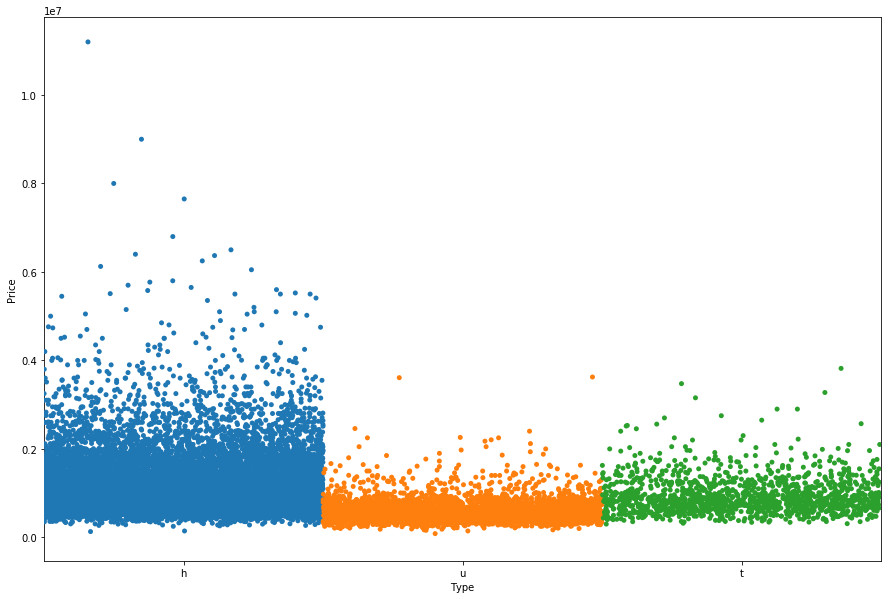

In [28]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df3, x='Type', y='Price', jitter=.5)
plt.show()

In [29]:
df_copy = pd.merge(df_copy, temp3, on='Type', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,CouncilArea,Regionname,Propertycount,max_sub_id,min_sub_id,mean_sub_id,max_t_id,min_t_id,mean_t_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,0.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,0.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,1.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,2.0,Yarra City Council,Northern Metropolitan,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0


In [30]:
method = df3.groupby('Method').agg({'min', 'mean', 'max'})
temp4 = method['Price']
temp4 = temp4.reset_index()
temp4.columns = ['Method', 'max_m_id', 'min_m_id', 'mean_m_id']
temp4

,Method,max_m_id,min_m_id,mean_m_id
0,PI,1.147828e+06,9000000.0,85000.0
1,S,1.082781e+06,7650000.0,185000.0
2,SA,1.020932e+06,3225000.0,240000.0
3,SP,9.097840e+05,6050000.0,190000.0
4,VB,1.227089e+06,11200000.0,160000.0


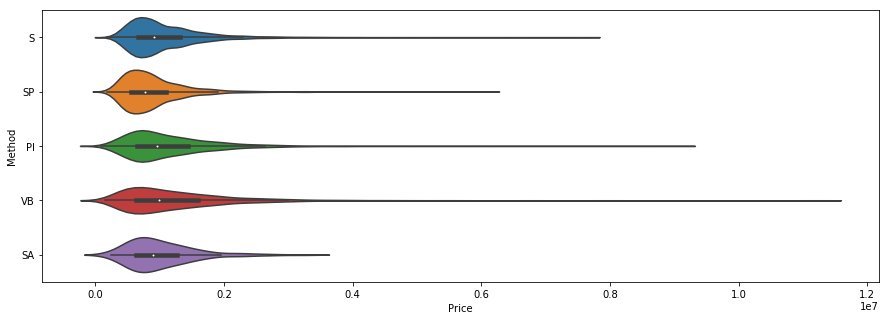

In [31]:
f, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data = df3, x='Price', y='Method', jitter=.5)
plt.show()

In [32]:
df_copy = pd.merge(df_copy, temp4, on='Method', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Propertycount,max_sub_id,min_sub_id,mean_sub_id,max_t_id,min_t_id,mean_t_id,max_m_id,min_m_id,mean_m_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0,1.082781e+06,7650000.0,185000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0,1.082781e+06,7650000.0,185000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0,9.097840e+05,6050000.0,190000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0,1.147828e+06,9000000.0,85000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,4019.0,1.067377e+06,1876000.0,300000.0,1.224544e+06,11200000.0,131000.0,1.227089e+06,11200000.0,160000.0


In [33]:
sellerg = df3.groupby('SellerG').agg({'min', 'mean', 'max'})
temp5 = sellerg['Price']
temp5 = temp5.reset_index()
temp5.columns = ['SellerG', 'max_s_id', 'min_s_id', 'mean_s_id']
print(temp5.info())
temp5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
SellerG      299 non-null object
max_s_id     299 non-null float64
min_s_id     299 non-null float64
mean_s_id    299 non-null float64
dtypes: float64(3), object(1)
memory usage: 9.4+ KB
None


,SellerG,max_s_id,min_s_id,mean_s_id
0,@Realty,1.006000e+06,1650000.0,499000.0
1,ASL,1.227100e+06,1890000.0,705500.0
2,Abercromby's,2.065455e+06,7650000.0,500000.0
3,Ace,5.900000e+05,600000.0,580000.0
4,Alex,1.100000e+06,1100000.0,1100000.0


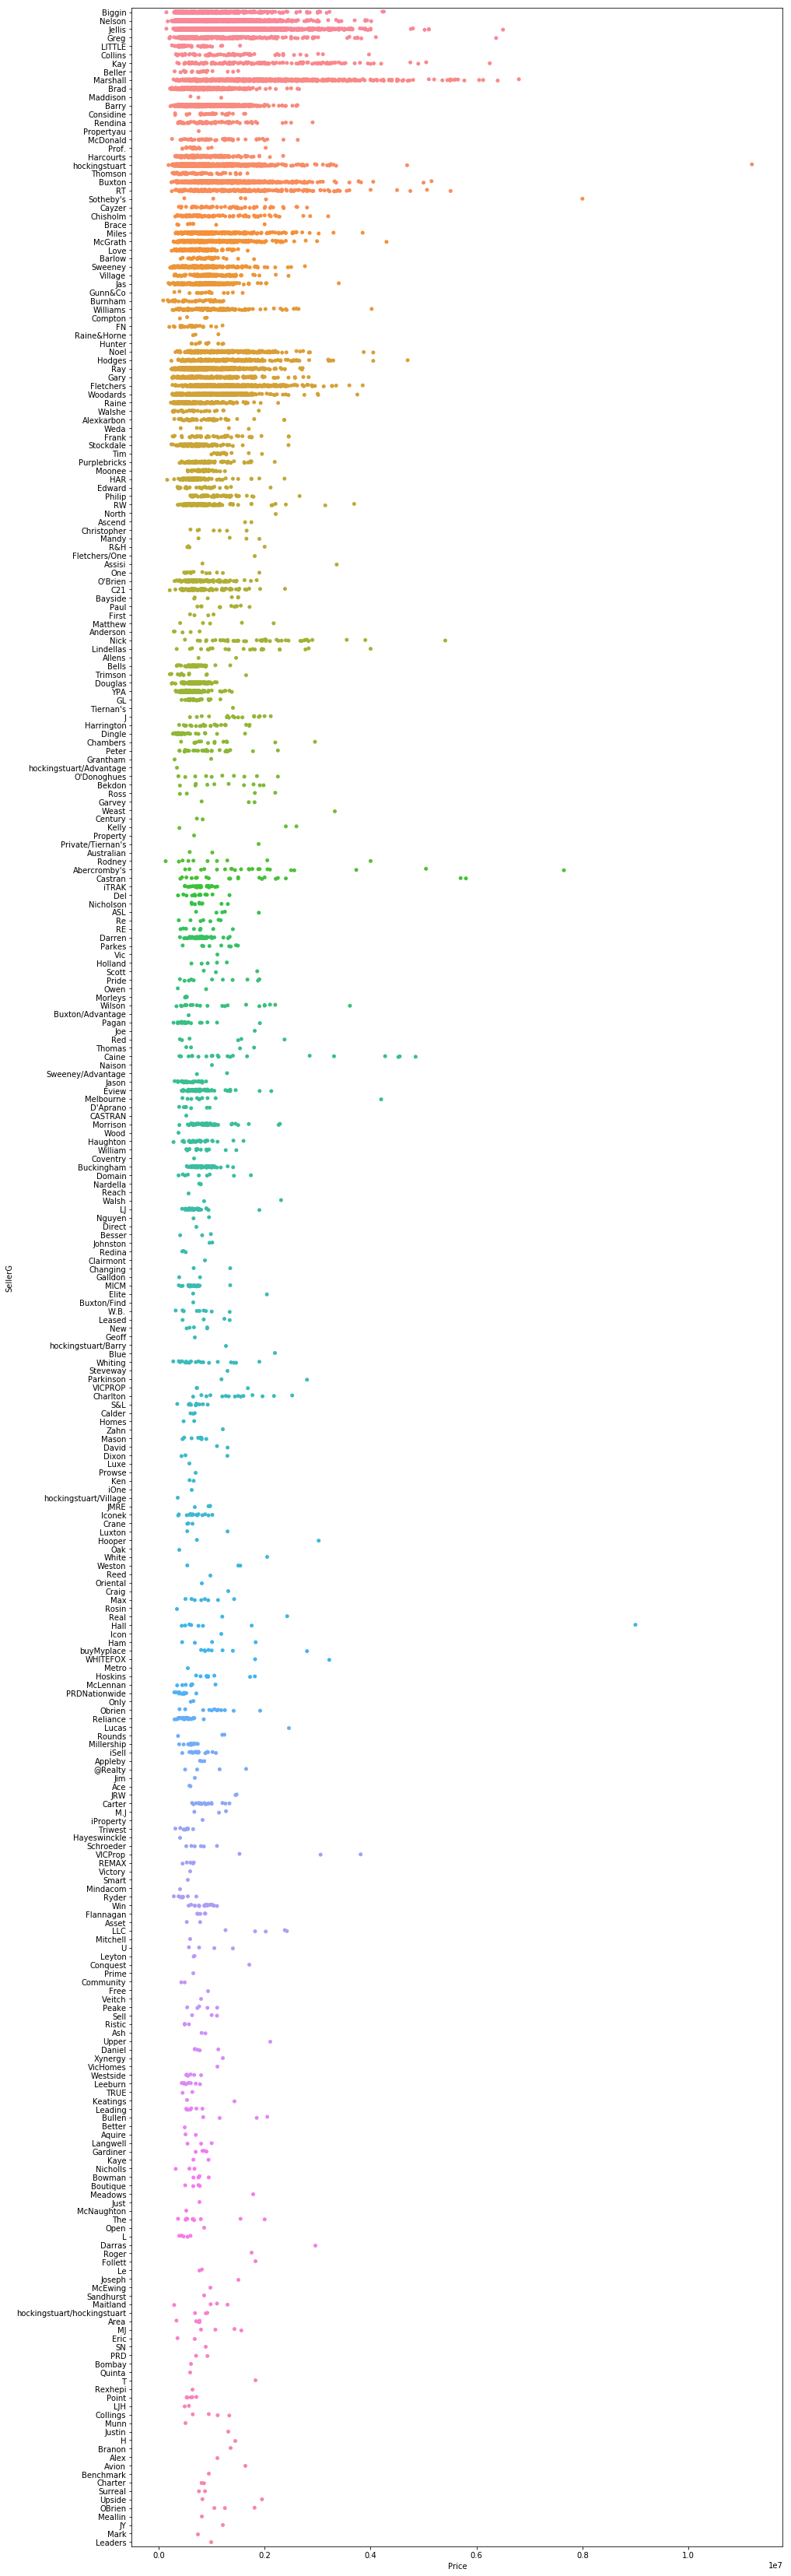

In [34]:
f, ax = plt.subplots(figsize=(15, 60))
sns.stripplot(data = df3, x='Price', y='SellerG', jitter=.1)
plt.show()

In [35]:
df_copy = pd.merge(df_copy, temp5, on='SellerG', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_sub_id,max_t_id,min_t_id,mean_t_id,max_m_id,min_m_id,mean_m_id,max_s_id,min_s_id,mean_s_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,300000.0,1.224544e+06,11200000.0,131000.0,1.082781e+06,7650000.0,185000.0,1.042112e+06,4250000.0,145000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,300000.0,1.224544e+06,11200000.0,131000.0,1.082781e+06,7650000.0,185000.0,1.042112e+06,4250000.0,145000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,300000.0,1.224544e+06,11200000.0,131000.0,9.097840e+05,6050000.0,190000.0,1.042112e+06,4250000.0,145000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,300000.0,1.224544e+06,11200000.0,131000.0,1.147828e+06,9000000.0,85000.0,1.042112e+06,4250000.0,145000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,300000.0,1.224544e+06,11200000.0,131000.0,1.227089e+06,11200000.0,160000.0,1.044783e+06,4011000.0,170000.0


In [36]:
council = df3.groupby('CouncilArea').agg({'min', 'mean', 'max'})
temp6 = council['Price']
temp6 = temp6.reset_index()
temp6.columns = ['CouncilArea', 'max_c_id', 'min_c_id', 'mean_c_id']
print(temp6.info())
temp6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
CouncilArea    33 non-null object
max_c_id       33 non-null float64
min_c_id       33 non-null float64
mean_c_id      33 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB
None


,CouncilArea,max_c_id,min_c_id,mean_c_id
0,Banyule City Council,9.595082e+05,3850000.0,325000.0
1,Bayside City Council,1.651938e+06,11200000.0,290000.0
2,Boroondara City Council,1.706077e+06,8000000.0,160000.0
3,Brimbank City Council,6.898894e+05,1475000.0,145000.0
4,Cardinia Shire Council,5.810312e+05,910000.0,410500.0


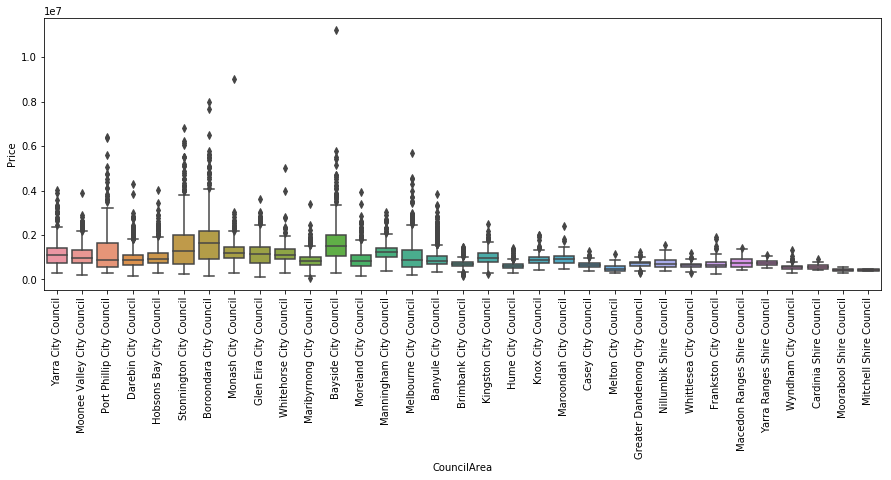

In [37]:
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data = df3, x='CouncilArea', y='Price')
plt.xticks(rotation='vertical')
plt.show()

In [38]:
#df_copy = df_copy.drop(['max_c_id_y', 'min_c_id_y', 'mean_c_id_y'], axis=1)

In [39]:
df_copy = pd.merge(df_copy, temp6, on='CouncilArea', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_t_id,max_m_id,min_m_id,mean_m_id,max_s_id,min_s_id,mean_s_id,max_c_id,min_c_id,mean_c_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,131000.0,1.082781e+06,7650000.0,185000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,131000.0,1.082781e+06,7650000.0,185000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,131000.0,9.097840e+05,6050000.0,190000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,131000.0,1.147828e+06,9000000.0,85000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,131000.0,1.227089e+06,11200000.0,160000.0,1.044783e+06,4011000.0,170000.0,1.133200e+06,4011000.0,270000.0


In [40]:
region = df3.groupby('Regionname').agg({'min', 'mean', 'max'})
temp7 = region['Price']
temp7 = temp7.reset_index()
temp7.columns = ['Regionname', 'max_r_id', 'min_r_id', 'mean_r_id']
print(temp7.info())
temp7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Regionname    8 non-null object
max_r_id      8 non-null float64
min_r_id      8 non-null float64
mean_r_id     8 non-null float64
dtypes: float64(3), object(1)
memory usage: 336.0+ bytes
None


,Regionname,max_r_id,min_r_id,mean_r_id
0,Eastern Metropolitan,1.125763e+06,5000000.0,288000.0
1,Eastern Victoria,7.126028e+05,1815000.0,400000.0
2,Northern Metropolitan,8.967678e+05,4550000.0,145000.0
3,Northern Victoria,6.195581e+05,1430000.0,330000.0
4,South-Eastern Metropolitan,9.005539e+05,9000000.0,266000.0


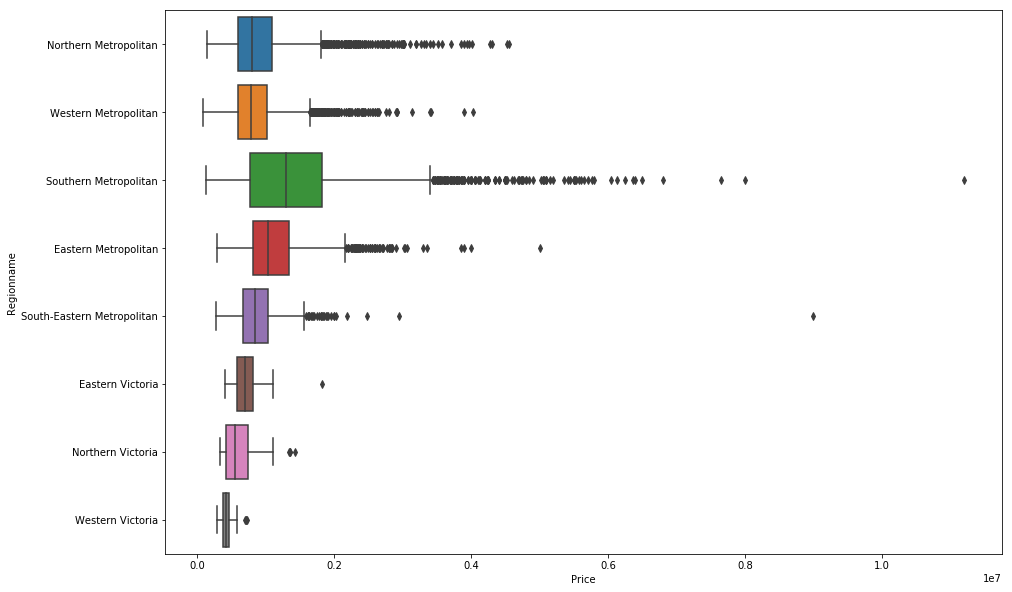

In [41]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df3, x='Price', y='Regionname')
#plt.xticks(rotation='vertical')
plt.show()

In [42]:
df_copy = pd.merge(df_copy, temp7, on='Regionname', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_m_id,max_s_id,min_s_id,mean_s_id,max_c_id,min_c_id,mean_c_id,max_r_id,min_r_id,mean_r_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,185000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,185000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,190000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,85000.0,1.042112e+06,4250000.0,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,160000.0,1.044783e+06,4011000.0,170000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0


In [43]:
df_copy['date_m'], df_copy['date_d'], df_copy['date_y'] = df_copy['Date'].str.split('/', 2).str
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_s_id,max_c_id,min_c_id,mean_c_id,max_r_id,min_r_id,mean_r_id,date_m,date_d,date_y
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0,3,12,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0,4,02,2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0,4,03,2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,145000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0,4,03,2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,170000.0,1.133200e+06,4011000.0,270000.0,896767.757631,4550000.0,145000.0,4,06,2016



### Does the "when you sell your home" matter?


In [44]:
df_copy['date_m'] = df_copy['date_m'].astype(int)

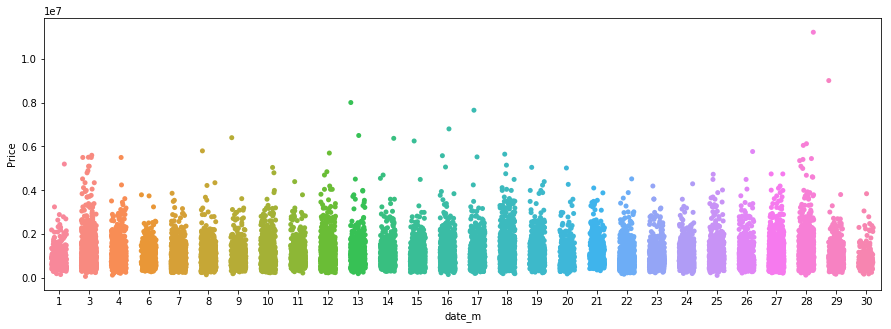

In [45]:
f, ax = plt.subplots(figsize=(15, 5))
sns.stripplot(data = df_copy, x='date_m', y='Price', jitter=.25)
plt.show()

In [46]:
df_copy['date_d'] = df_copy['date_d'].astype(int)

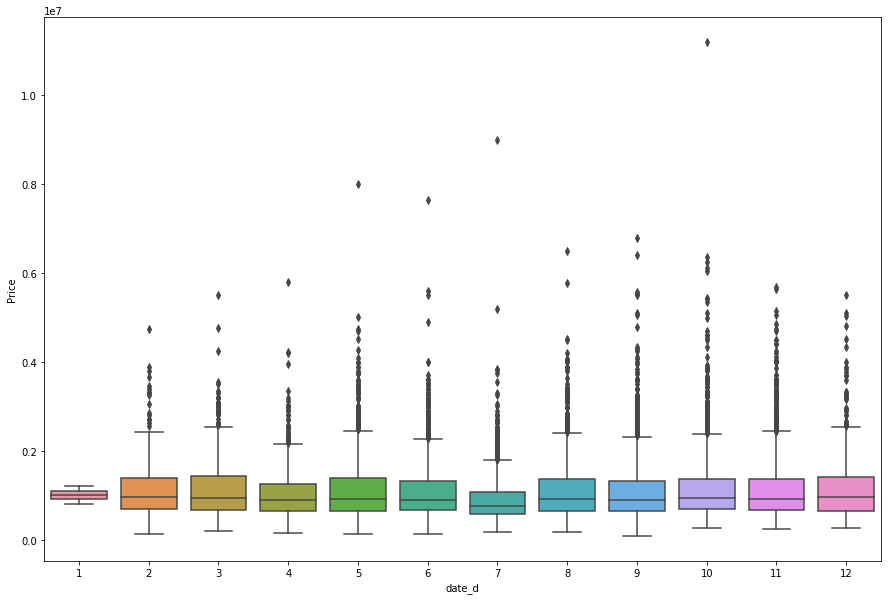

In [47]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df_copy, x='date_d', y='Price')
plt.show()

In [48]:
df_copy['date_y'] = df_copy['date_y'].astype(int)

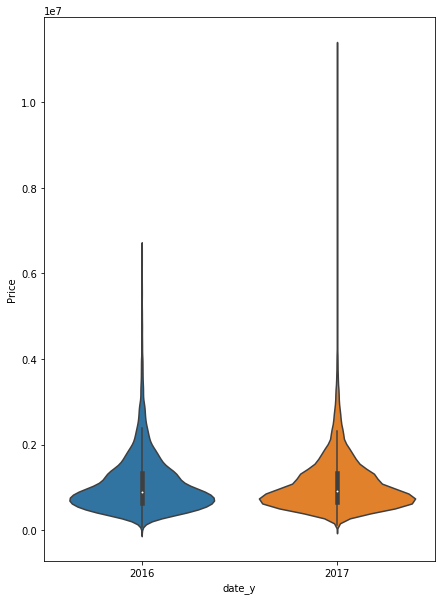

In [49]:
f, ax = plt.subplots(figsize=(7, 10))
sns.violinplot(data = df_copy, x='date_y', y='Price')
plt.show()

### Lets see how many features we now have:

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17503 entries, 0 to 17502
Data columns (total 37 columns):
Suburb           17503 non-null object
Address          17503 non-null object
Rooms            17503 non-null int64
Type             17503 non-null object
Price            17503 non-null float64
Method           17503 non-null object
SellerG          17503 non-null object
Date             17503 non-null object
Distance         17503 non-null float64
Postcode         17503 non-null int64
Bedroom2         17503 non-null float64
Bathroom         17503 non-null float64
Car              17503 non-null float64
CouncilArea      17503 non-null object
Regionname       17503 non-null object
Propertycount    17503 non-null float64
max_sub_id       17503 non-null float64
min_sub_id       17503 non-null float64
mean_sub_id      17503 non-null float64
max_t_id         17503 non-null float64
min_t_id         17503 non-null float64
mean_t_id        17503 non-null float64
max_m_id         17503 

In [51]:
df_copy = df_copy.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'], axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17503 entries, 0 to 17502
Data columns (total 29 columns):
Rooms            17503 non-null int64
Price            17503 non-null float64
Distance         17503 non-null float64
Postcode         17503 non-null int64
Bedroom2         17503 non-null float64
Bathroom         17503 non-null float64
Car              17503 non-null float64
Propertycount    17503 non-null float64
max_sub_id       17503 non-null float64
min_sub_id       17503 non-null float64
mean_sub_id      17503 non-null float64
max_t_id         17503 non-null float64
min_t_id         17503 non-null float64
mean_t_id        17503 non-null float64
max_m_id         17503 non-null float64
min_m_id         17503 non-null float64
mean_m_id        17503 non-null float64
max_s_id         17503 non-null float64
min_s_id         17503 non-null float64
mean_s_id        17503 non-null float64
max_c_id         17503 non-null float64
min_c_id         17503 non-null float64
mean_c_id      

### Let's see how our new features correlate to the price:

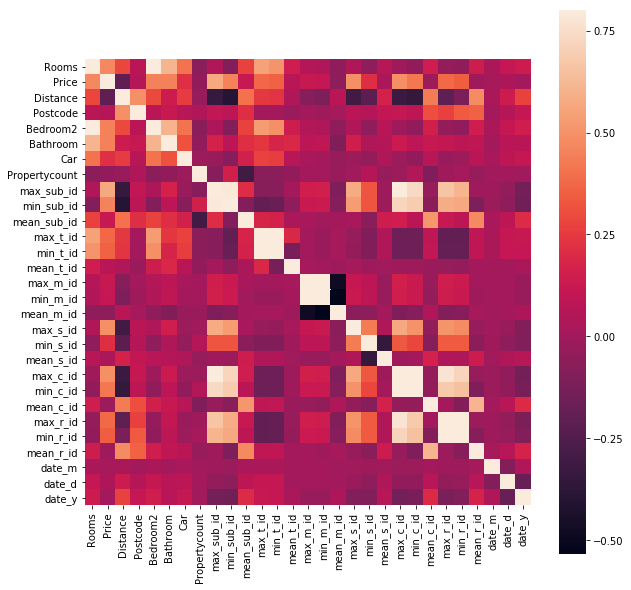

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Propertycount,max_sub_id,min_sub_id,...,mean_s_id,max_c_id,min_c_id,mean_c_id,max_r_id,min_r_id,mean_r_id,date_m,date_d,date_y
Rooms,1.000000,0.467160,0.287062,0.076341,0.953141,0.607669,0.404161,-0.069178,0.041716,-0.090008,...,0.070561,-0.008867,-0.044519,0.148248,-0.034401,-0.046791,0.139469,0.030607,0.107993,0.133363
Price,0.467160,1.000000,-0.202166,0.057215,0.450063,0.446062,0.220543,-0.045520,0.575266,0.451902,...,0.023846,0.489389,0.424079,-0.016789,0.381451,0.351389,-0.005282,0.014009,0.037862,0.009876
Distance,0.287062,-0.202166,1.000000,0.488446,0.290000,0.137181,0.253450,-0.023973,-0.342068,-0.401573,...,0.169588,-0.328214,-0.346618,0.432591,-0.208172,-0.118468,0.478934,0.024348,0.134285,0.274481
Postcode,0.076341,0.057215,0.488446,1.000000,0.080339,0.118208,0.068276,0.047080,0.099459,0.088066,...,0.103440,0.114295,0.089767,0.307392,0.263843,0.336437,0.359956,0.005593,0.060895,0.111305
Bedroom2,0.953141,0.450063,0.290000,0.080339,1.000000,0.604719,0.405533,-0.069356,0.036318,-0.091437,...,0.075629,-0.012727,-0.048657,0.155463,-0.035419,-0.048222,0.147066,0.031060,0.114152,0.153559
Bathroom,0.607669,0.446062,0.137181,0.118208,0.604719,1.000000,0.315931,-0.045290,0.168768,0.081801,...,0.059557,0.128244,0.084511,0.121373,0.103048,0.086696,0.091904,0.005916,0.074345,0.074041
Car,0.404161,0.220543,0.253450,0.068276,0.405533,0.315931,1.000000,-0.017083,-0.020601,-0.085434,...,0.048724,-0.017660,-0.049041,0.070895,-0.022282,-0.017110,0.079091,0.018678,0.086966,0.113238
Propertycount,-0.069178,-0.045520,-0.023973,0.047080,-0.069356,-0.045290,-0.017083,1.000000,-0.079129,0.156100,...,-0.031165,-0.014909,0.050360,-0.106270,-0.003913,0.015453,-0.033373,-0.000748,0.012480,0.002655
max_sub_id,0.041716,0.575266,-0.342068,0.099459,0.036318,0.168768,-0.020601,-0.079129,1.000000,0.785554,...,-0.010216,0.850719,0.737189,-0.029185,0.663087,0.610829,-0.009181,-0.010661,-0.040527,-0.134194
min_sub_id,-0.090008,0.451902,-0.401573,0.088066,-0.091437,0.081801,-0.085434,0.156100,0.785554,1.000000,...,-0.015163,0.722134,0.685681,-0.074870,0.583587,0.570454,-0.109443,-0.016755,-0.055645,-0.147053


In [52]:
f, ax = plt.subplots(figsize=(10, 10))
corrmat = df_copy.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

WOW!!! If you look at max sub id, this has a .575 score to price. This is really good, lets see how our new features fare against the same models we used. Let's revisit **Decision Tree Regressor.**

In [53]:
X = df_copy.drop('Price', axis=1)
Y = df_copy.Price

In [54]:
scores = []
depth = []
for n in range(2, 15):
    dtr = DecisionTreeRegressor(max_features=15, max_depth=n)
    dtr.fit(X, Y)
    scores.append(cross_val_score(dtr, X, Y, cv=12).mean())
    depth.append(n)

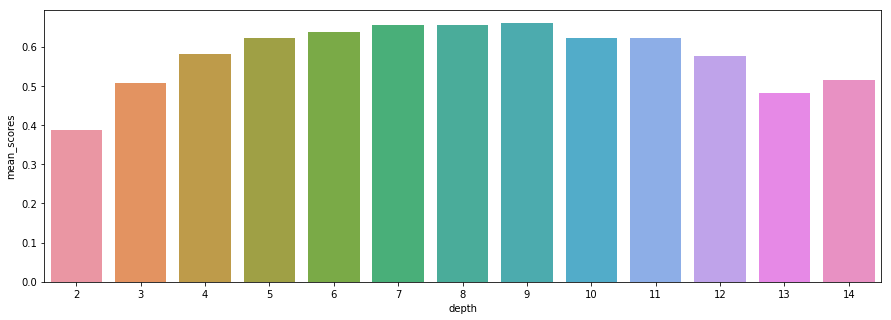

In [55]:
plt_dtr = pd.DataFrame()

plt_dtr['mean_scores'] = scores
plt_dtr['depth'] = depth

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_dtr, x='depth', y='mean_scores')
plt.show()

The above bar graph represent number of max depth on the x-axis that the model will limit itself to and on the y-axis is the mean scores of the cross validation of 12 folds. As you can see even the worst mean score of approximately 4, this model guesses way better due to having more information.

### Let's try "Nearest Neighbors" once more:

In [56]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)

print(cross_val_score(knn, X, Y, cv=12))

[ 0.33846953  0.40896294  0.42289898  0.2111129   0.48215838  0.48233078
  0.4574364   0.53772496  0.59196189  0.46647045  0.48797344  0.53283051]


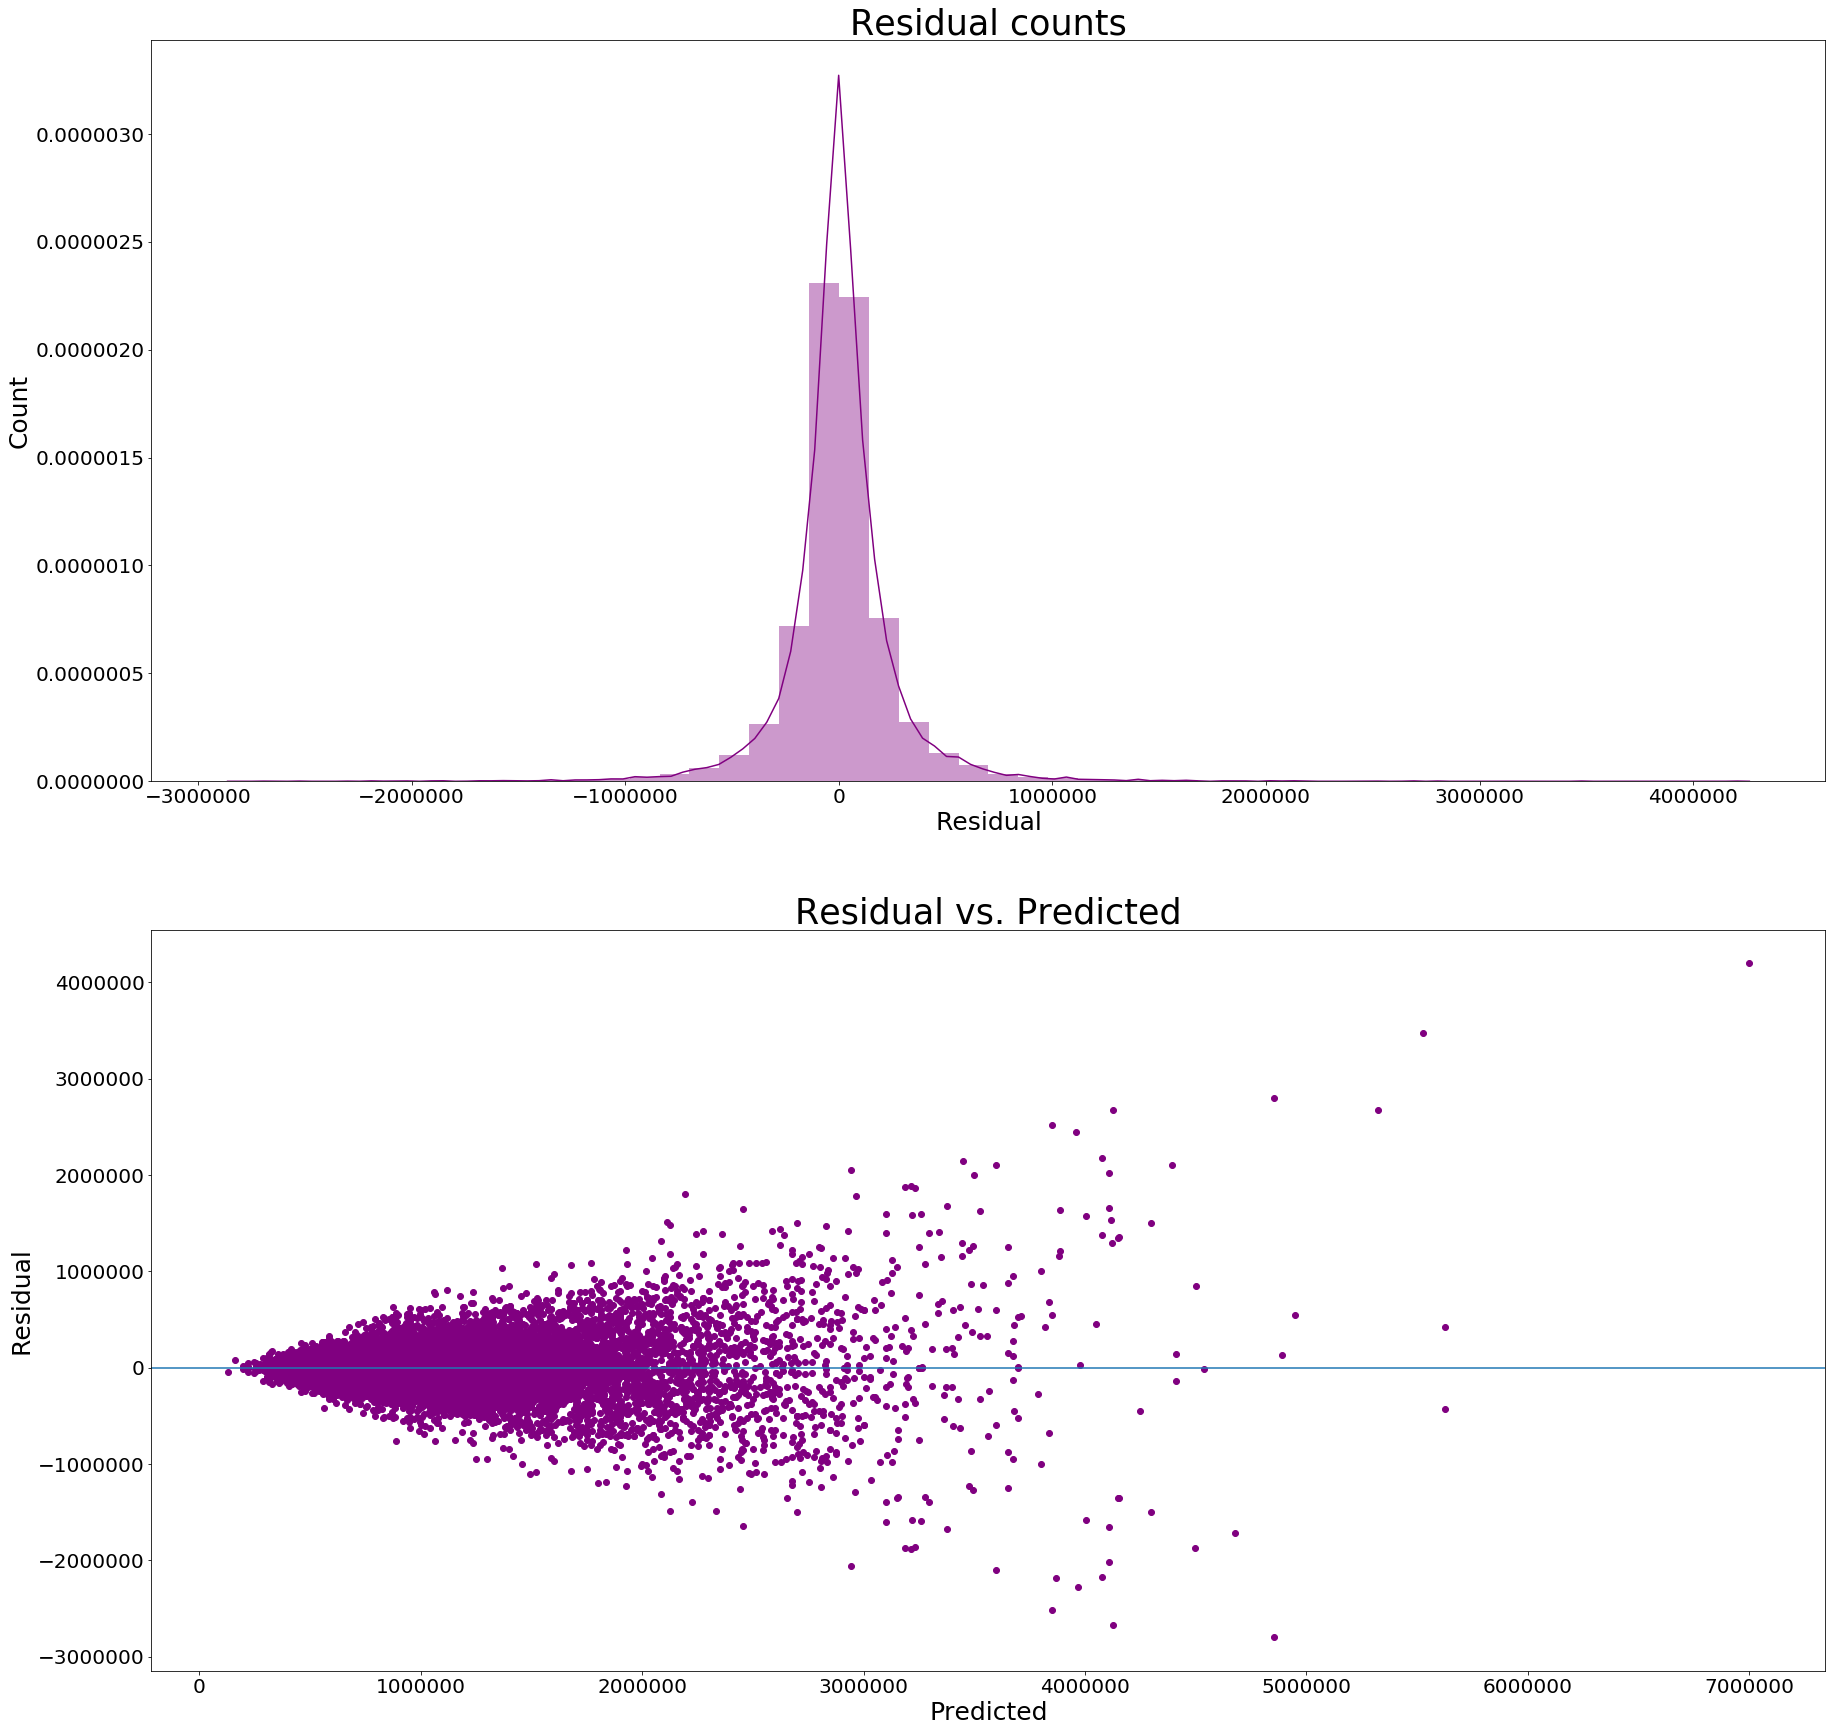

RMSE:
264179.577229


In [57]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)

predicted = knn.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='purple')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='purple')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

It appears that the RMSE is higher this time around, but I believe this is due to higher priced homes does not follow the normal pricing pattern. It seems that $2,000,000 would be the threshold for home prices.

### Lets give "Lasso & Ridge" another shot:

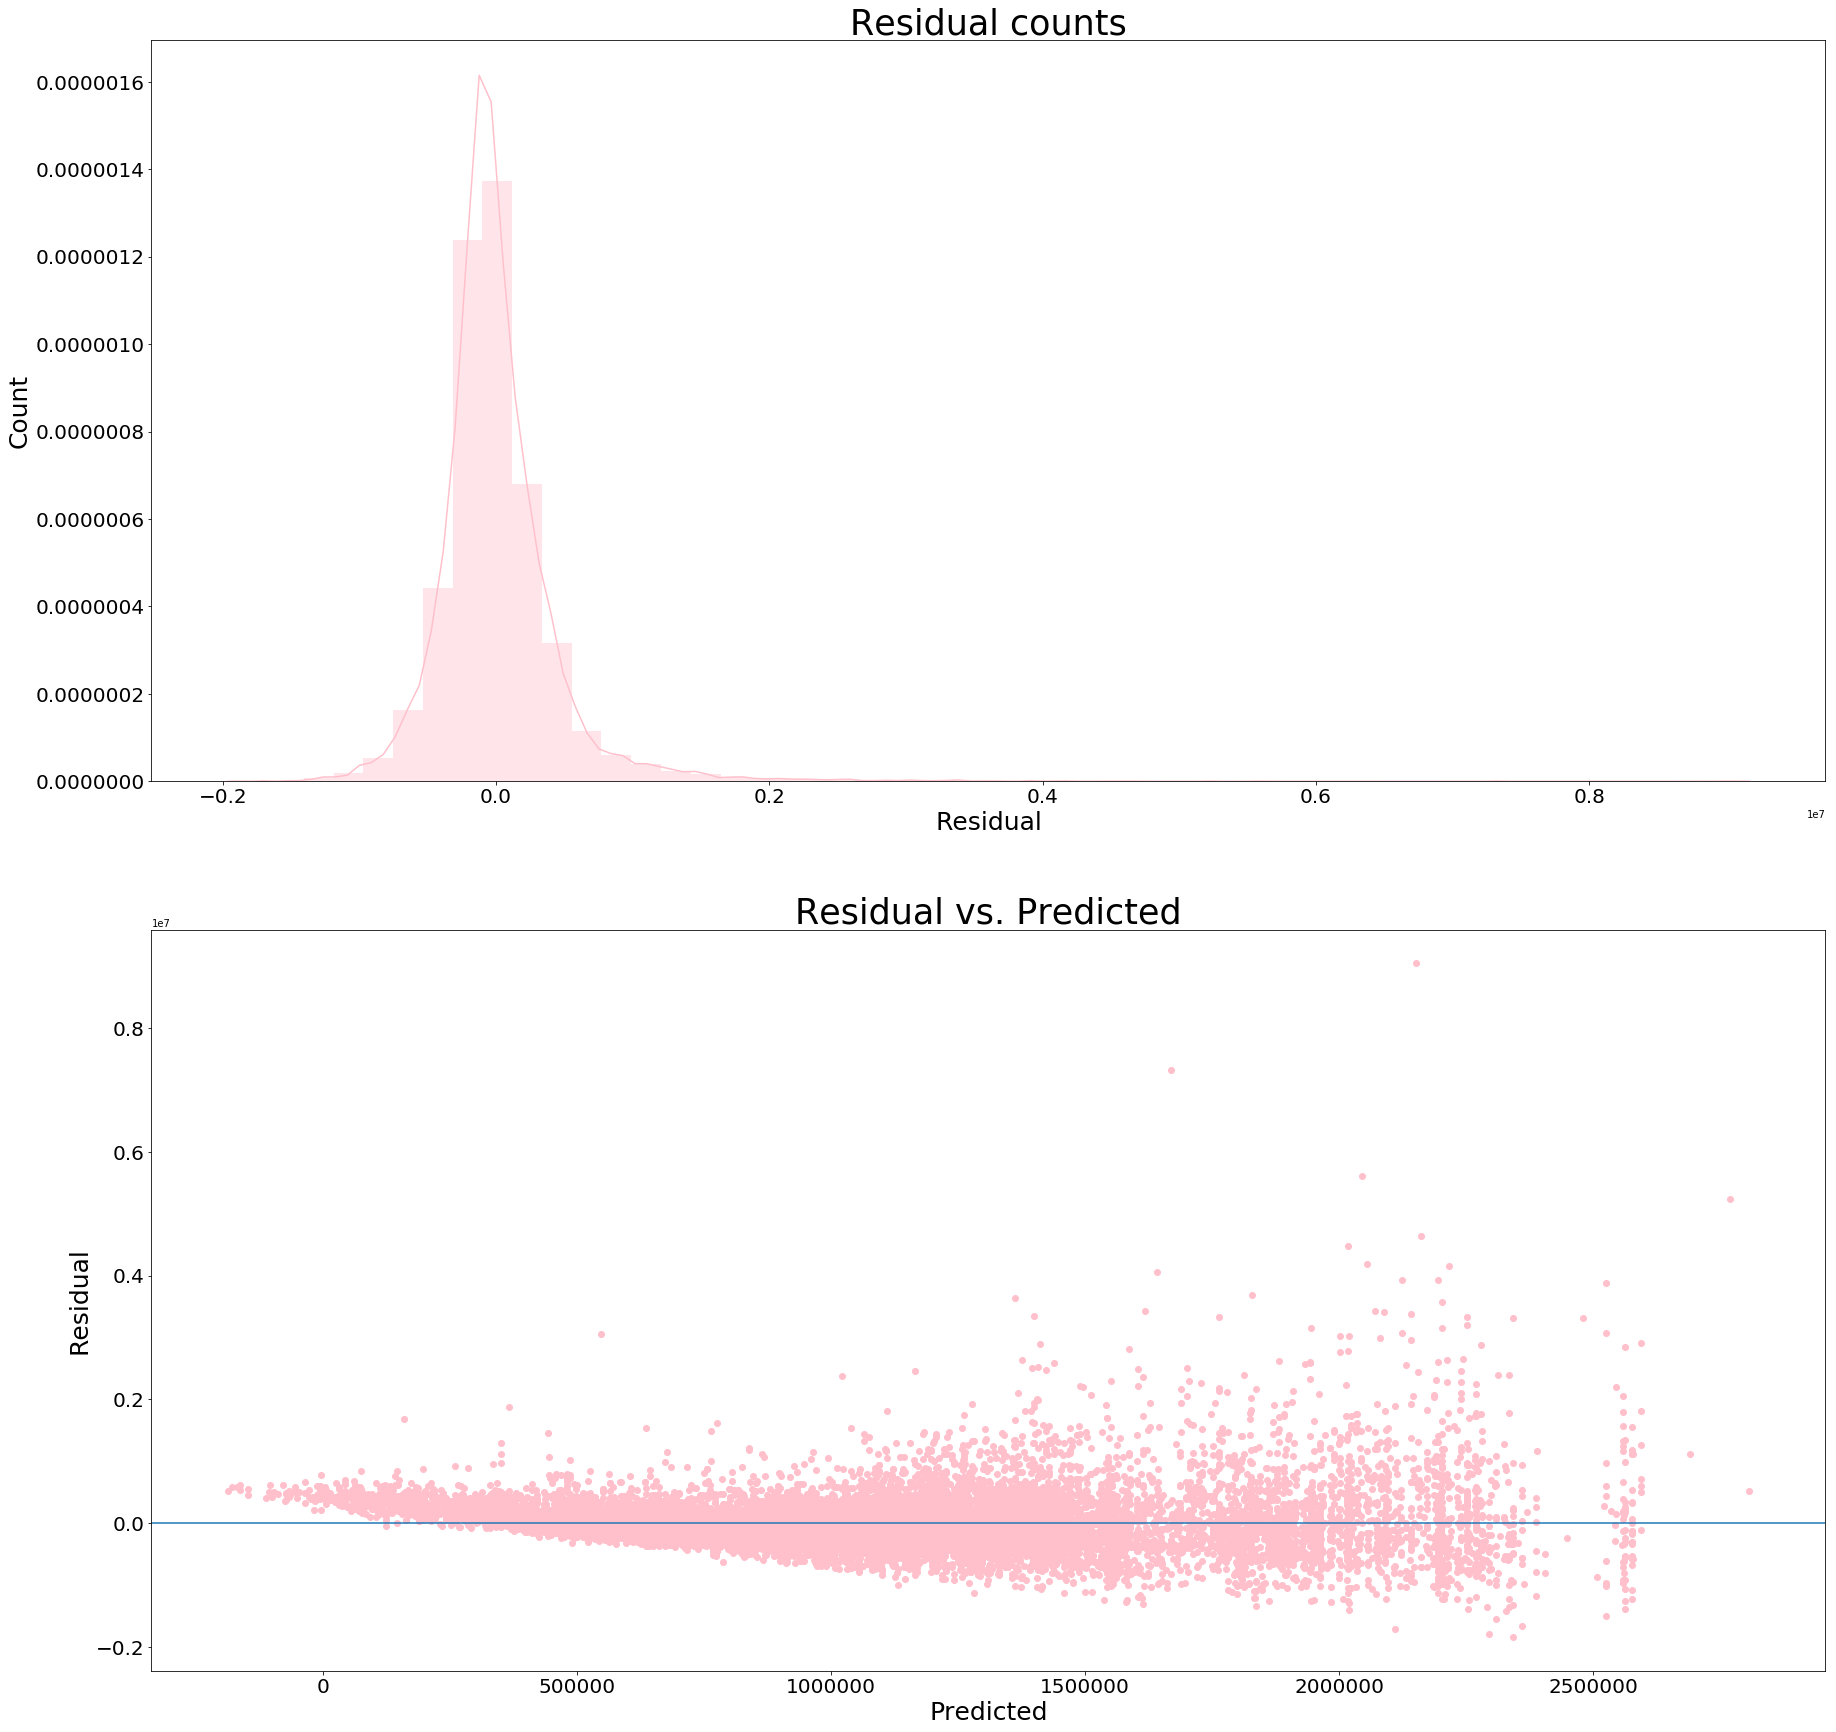

RMSE:
436333.319693


In [58]:
lass = linear_model.Lasso(alpha = 1.15e8)
lass.fit (X, Y)

predicted = lass.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='pink')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='pink')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [59]:
lass = linear_model.Lasso(alpha = 1.15e8)
lass.fit (X, Y)

print('\nR²:')
print(lass.score(X, Y))
origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter features:')
print(origparams)

print('\nCross Validation Score:')
print(cross_val_score(lass, X, Y, cv=12))


R²:
0.552261796792

Parameter features:
[  0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   6.82753906e-01
   2.29526779e-02  -2.05562786e-01   1.05323117e+00   1.01150694e-02
   0.00000000e+00   8.42863048e-02   2.34978093e-03   9.89470793e-02
   4.16820318e-01  -2.36061134e-03   3.30677814e-03   2.38158180e-02
   5.48720475e-03  -7.68720545e-02   1.24342174e-01   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -1.61429034e+06]

Cross Validation Score:
[ 0.49738752  0.54563165  0.52079373  0.44790887  0.53081998  0.52632546
  0.5637618   0.60269154  0.55299062  0.5886042   0.52651884  0.5793962 ]


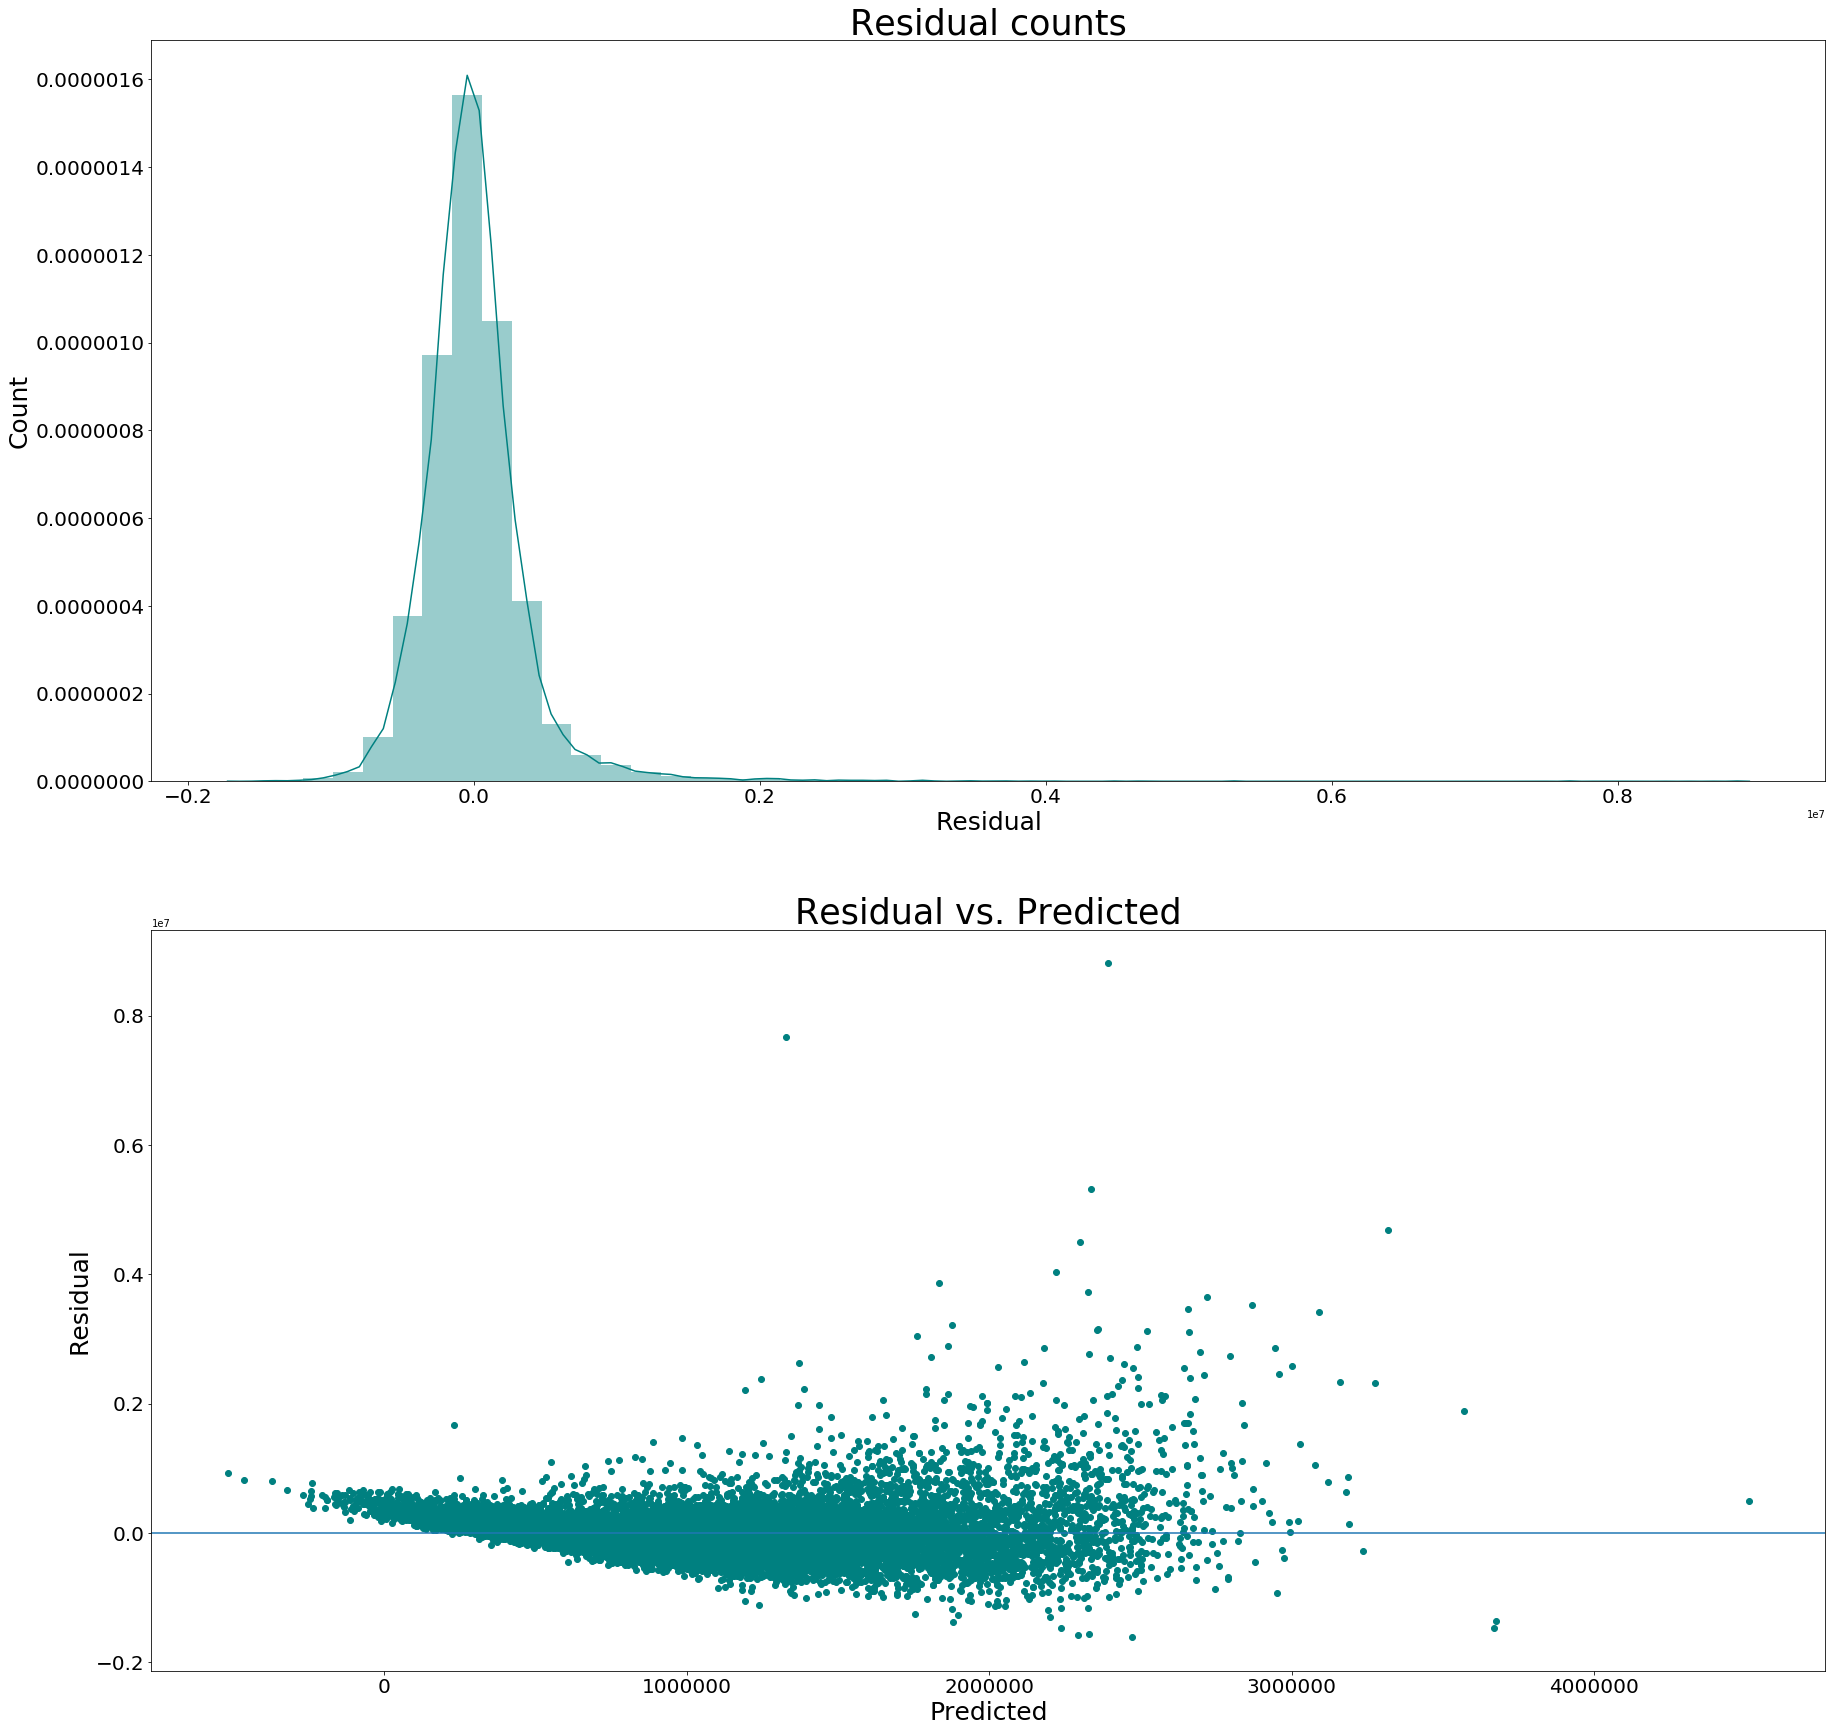

RMSE:
376467.853868


In [60]:
rid = linear_model.Ridge(alpha = 90)
rid.fit (X, Y)

predicted = rid.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [61]:
rid = linear_model.Ridge(alpha = 90)
rid.fit (X, Y)

print('\nR²:')
print(rid.score(X, Y))
origparams_rid = np.append(rid.coef_, rid.intercept_)
print('\nParameter features:')
print(origparams_rid)

print('\nCross Validation Score:')
print(cross_val_score(rid, X, Y, cv=12))


R²:
0.666693953651

Parameter features:
[  1.50984881e+05  -2.34715368e+04   2.07881190e+02   9.87603208e+03
   1.51010200e+05   4.09302534e+04  -1.94051056e+00   5.86214602e-01
   1.62739240e-02  -3.87338083e-01   3.00496760e-01   3.71229782e-02
   2.00708842e-01   3.39693629e-01  -1.97979521e-02   6.83118952e-01
   3.07000233e-01  -1.72802325e-03   3.18068576e-02  -1.04132855e-02
   4.99387299e-03   3.20754017e-02  -1.73241692e-01   2.79960354e-02
   5.71423427e-01   6.02771858e+02   6.81566843e+03   8.68772222e+04
  -1.77347536e+08]

Cross Validation Score:
[ 0.67794084  0.70153495  0.65844772  0.6001858   0.64836525  0.66597047
  0.67100246  0.6756346   0.60031798  0.66856475  0.62072758  0.68243313]


### Ridge is the winner:
Although the RMSE score is high look at the cross validation score, it ranges between 60-70%. This is really good. Lets take a look at the coefficients and see dollar to dollar what each feature is valued at.

In [62]:
cdf = pd.DataFrame(data = rid.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,150984.880563
Distance,-23471.536787
Postcode,207.881190
Bedroom2,9876.032080
Bathroom,151010.200026
Car,40930.253428
Propertycount,-1.940511
max_sub_id,0.586215
min_sub_id,0.016274
mean_sub_id,-0.387338


### Boosting:
Boosting is a machine learning ensemble meta-algorithm for primarily **reducing bias, and also variance** in supervised learning, and a family of machine learning algorithms which convert weak learners to strong ones. Boosting is based on the question posed by Kearns and Valiant (1988, 1989): Can a set of weak learners create a single strong learner? A weak learner is defined to be a classifier which is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification. ~ [WikiPedia](https://en.wikipedia.org/wiki/Boosting_(machine_learning))

Let's see if boosting can improve our scores.

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

r_sq = []
deep = []
mean_scores = []

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())

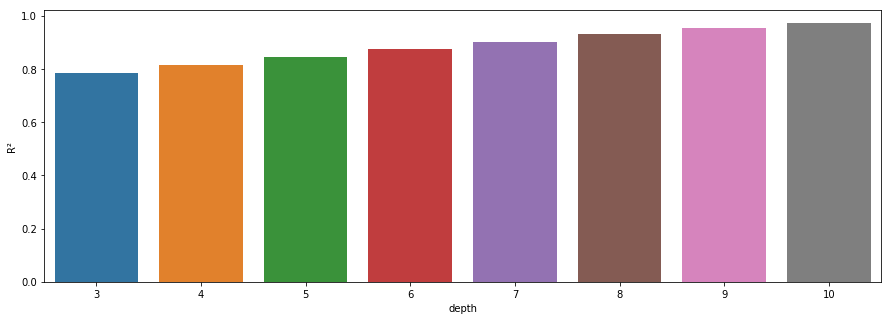

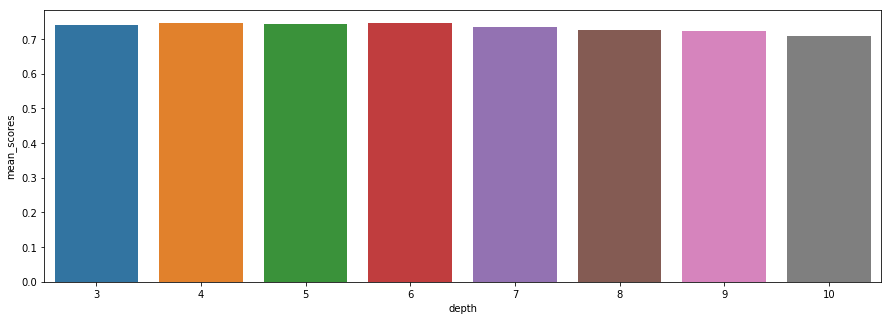

In [64]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

In [65]:
gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X, Y)
predicted = gbr.predict(X)
rmse = np.sqrt(mean_squared_error(Y, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)


Cross Validation Scores:
[ 0.73625495  0.77869957  0.74322642  0.68035798  0.762076    0.77081045
  0.75304166  0.76887177  0.70586018  0.75882111  0.72045356  0.76676368]

Mean Score:
0.745436445617

RMSE:
230946.702191


### Boosting is as advertised!!!
It reduced the bias and variances. This is evidenced by a higher mean score and a much lower RMSE than the ridge model.

In [66]:
cdf = pd.DataFrame(data = gbr.feature_importances_, index = X.columns, columns = ['Importance'])
cdf

,Importance
Rooms,0.066289
Distance,0.075723
Postcode,0.034979
Bedroom2,0.042421
Bathroom,0.067228
Car,0.064134
Propertycount,0.026078
max_sub_id,0.109792
min_sub_id,0.070398
mean_sub_id,0.033192
